# EDA

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/train.csv')

In [ ]:
df.head()

In [ ]:
df.loc[df.title == 'L.I.E.'].T

In [ ]:
df.head(1).T

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify genre columns (columns 15-34)
# Get all column names from the dataframe
all_columns = df.columns.tolist()
# Assuming genres are columns 15-34 (index 14-33 since 0-based)
genre_columns = all_columns[14:34]

# print("Genre columns:", genre_columns)

# 1. Count movies for each genre
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

# 2. Calculate number of genres per movie
df['genre_count'] = df[genre_columns].sum(axis=1)
genre_per_movie = df['genre_count'].value_counts().sort_index()

# 3. Display results
# print("\nNumber of movies per genre:")
# print(genre_counts)

# print("\nDistribution of genres per movie:")
# print(genre_per_movie)

# 4. Visualization: Number of movies per genre
# plt.figure(figsize=(14, 7))
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(6, 5))
ax = genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
# plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Display values on top of bars
# for i, v in enumerate(genre_counts):
#     ax.text(i, v + 7, str(v), ha='center')

plt.tight_layout()
# plt.savefig('genre_distribution.png')
# plt.show()

In [ ]:
genre_per_movie_avg = genre_per_movie.to_frame().reset_index()
genre_per_movie_avg['total_count'] = genre_per_movie_avg.genre_count * genre_per_movie_avg['count']
genre_per_movie_avg.total_count.sum() / len(df)

In [ ]:
# 5. Visualization: Distribution of genres per movie
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(5, 3))
ax = genre_per_movie.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Genres per Movie', fontsize=16)
plt.xlabel('Number of Genres', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
# for i, v in enumerate(genre_per_movie):
#     ax.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
# plt.savefig('genres_per_movie.png')

In [ ]:
# 6. Additional analysis: Correlation between genres
# plt.figure(figsize=(16, 14))
plt.figure(figsize=(8, 7))
correlation = df[genre_columns].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Between Genres', fontsize=16)
plt.tight_layout()
# plt.savefig('genre_correlation.png')

In [ ]:
# 7. Analyze genre trends by year/decade
# Assuming there's a 'year' or 'release_date' column in the dataset
# If it's a date string, extract the year
# Create decade column (2000, 2010, 2020, etc.)
df['year'] = df.release_date.apply(lambda x: int(x.split('-')[0]))
df['decade'] = (df['year'] // 10) * 10

# Group by decade and calculate the proportion of movies in each genre
decade_genre_counts = {}

for decade in sorted(df['decade'].dropna().unique()):
    # Filter movies for this decade
    decade_df = df[df['decade'] == decade]
    # Calculate proportion of movies in each genre
    decade_genre_counts[decade] = decade_df[genre_columns].mean()

# Convert to DataFrame for easier plotting
decade_genre_df = pd.DataFrame(decade_genre_counts)

# Plot heatmap of genre proportions by decade
plt.figure(figsize=(14, 12))
sns.heatmap(decade_genre_df, annot=True, fmt=".2f", cmap="YlGnBu", 
            linewidths=.5, cbar_kws={'label': 'Proportion of Movies'})
plt.title('Genre Trends by Decade', fontsize=16)
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.tight_layout()
plt.savefig('genre_trends_by_decade.png')

# For top 5 genres, plot line chart showing trends over decades
top_genres = genre_counts.head(5).index.tolist()
plt.figure(figsize=(12, 7))
for genre in top_genres:
    plt.plot(decade_genre_df.columns, decade_genre_df.loc[genre], marker='o', linewidth=2, label=genre)

plt.title('Trends of Top 5 Genres Over Decades', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Proportion of Movies', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('top_genres_trend.png')

# Statistical test: Chi-squared test for independence between decade and genres
from scipy.stats import chi2_contingency

# Create contingency table: rows=decades, columns=genres
contingency_tables = {}
for genre in genre_columns:
    # Create a cross-tabulation of decade vs. genre presence
    cont_table = pd.crosstab(df['decade'], df[genre])
    contingency_tables[genre] = cont_table
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(cont_table)
    
    print(f"\nChi-squared test for {genre}:")
    print(f"Chi2 value: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    print(f"Significant at 0.05 level: {'Yes' if p < 0.05 else 'No'}")

In [ ]:
# 7. Analyze genre trends by year
# Extract year from release_date
df['year'] = df.release_date.apply(lambda x: int(x.split('-')[0]))

# Group by year and calculate the proportion of movies in each genre
year_genre_counts = {}
    
# Create bins for years to avoid sparse data
# Get min and max years
min_year = df['year'].min()
max_year = df['year'].max()
    
# Group by individual years and calculate proportion of movies in each genre
for year in sorted(df['year'].dropna().unique()):
    # Filter movies for this year
    year_df = df[df['year'] == year]
    # Calculate proportion of movies in each genre
    year_genre_counts[year] = year_df[genre_columns].mean()

# Convert to DataFrame for easier plotting
year_genre_df = pd.DataFrame(year_genre_counts)
    
# Plot heatmap of genre proportions by year
plt.figure(figsize=(16, 12))
sns.heatmap(year_genre_df, annot=False, cmap="YlGnBu", 
            linewidths=.5, cbar_kws={'label': 'Proportion of Movies'})
plt.title('Genre Trends by Year', fontsize=16)
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90)  # Rotate year labels for better readability
plt.tight_layout()
plt.savefig('genre_trends_by_year.png')

# For top 5 genres, plot line chart showing trends over years
top_genres = genre_counts.head(5).index.tolist()
plt.figure(figsize=(15, 7))
for genre in top_genres:
    plt.plot(year_genre_df.columns, year_genre_df.loc[genre], marker='.', linewidth=2, label=genre)

plt.title('Trends of Top 5 Genres Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Movies', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
# Add more ticks on x-axis for better readability
plt.xticks(np.arange(min(year_genre_df.columns), max(year_genre_df.columns)+1, 5))
plt.tight_layout()
plt.savefig('top_genres_trend_by_year.png')

# Statistical test: Consider grouping years for Chi-squared test to avoid sparse data
# Create year ranges for statistical testing (e.g., 5-year ranges)
df['year_group'] = (df['year'] // 5) * 5  # Group years by 5-year periods

# Statistical test: Chi-squared test for independence between year groups and genres
from scipy.stats import chi2_contingency

# Create contingency table: rows=year_groups, columns=genres
contingency_tables = {}
for genre in genre_columns:
    # Create a cross-tabulation of year_group vs. genre presence
    cont_table = pd.crosstab(df['year_group'], df[genre])
    contingency_tables[genre] = cont_table
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(cont_table)
    
    print(f"\nChi-squared test for {genre}:")
    print(f"Chi2 value: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    print(f"Significant at 0.05 level: {'Yes' if p < 0.05 else 'No'}")

In [ ]:
# Extract year from release_date
df['year'] = df.release_date.apply(lambda x: int(x.split('-')[0]))

# Count movies per year
movies_per_year = df['year'].value_counts().sort_index()

# Plot the number of movies per year
plt.figure(figsize=(15, 7))
ax = movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Add values on top of bars
for i, v in enumerate(movies_per_year):
    ax.text(i, v + 2, str(v), ha='center', fontsize=9)

plt.tight_layout()
# plt.savefig('movies_per_year.png')

# Fine-tuning

## Import

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertModel, BertModel, AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizerFast, BertForSequenceClassification
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# # Clear CUDA cache
# torch.cuda.empty_cache()

# # For more aggressive clearing
# device = torch.device('cuda')
# torch.cuda.empty_cache()
# torch.cuda.synchronize(device)

## Load

In [3]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# https://huggingface.co/AventIQ-AI/bert-movie-recommendation-system
# model_name = 'AventIQ-AI/bert-movie-recommendation-system'
# tokenizer = BertTokenizerFast.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [4]:
sample_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/sample.csv')

# Get genre column names (from sample.csv)
genre_columns = list(sample_df.columns)[1:]  # all columns except id

In [5]:
# ===== Load and preprocess data =====
def load_and_preprocess_data():
    train_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/train.csv')
    test_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/test.csv')
    sample_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/sample.csv')

    # Get genre column names (from sample.csv)
    genre_columns = list(sample_df.columns)[1:]  # all columns except id
    
    # Order of features (from most important to least important)
    feature_order = [
        'title', 'overview', 'tagline', 'original_title',
        'release_date', 'runtime', 'vote_average', 'vote_count',
        'budget', 'revenue', 'original_language', 'status', 'homepage'
    ]
    
    # Fill NaN values in all columns we'll use
    for col in feature_order:
        if col in train_df.columns:
            # Fill text columns with empty string
            if col in ['runtime', 'vote_average', 'budget', 'revenue']:
                train_df[col] = train_df[col].astype(str).replace('0', '(no data)').replace('0.0', '(no data)').replace('nan', '(no data)')
                test_df[col] = test_df[col].astype(str).replace('0', '(no data)').replace('0.0', '(no data)').replace('nan', '(no data)')
            else:
                train_df[col] = train_df[col].astype(str).replace('nan', '(no data)')
                test_df[col] = test_df[col].astype(str).replace('nan', '(no data)')
    
    # Fill release_date NaN values
    for df in [train_df, test_df]:
        df['release_date'] = df['release_date'].fillna('')
    
    # Create formatted text with bullet points
    for df in [train_df, test_df]:
        text_items = []
        
        for i, row in df.iterrows():
            row_text = []
            
            # Add each feature as a bullet point in the specified order
            for col in feature_order:
                if col in df.columns:
                    value = row[col]
                    # Format column name with spaces and title case
                    col_name = ' '.join(word.capitalize() for word in col.split('_'))
                    
                    row_text.append(f"* {col_name}: {value}")
            
            # Join all bullet points with newlines
            # text_items.append('\n'.join(row_text))
            # separate with SEP
            text_items.append(tokenizer.sep_token.join(row_text))
        
        df['text'] = text_items
    
    # Get labels (20 genre columns as a matrix)
    labels = train_df[genre_columns].values
    
    # Split into training and validation sets
    # train_texts, val_texts, train_labels, val_labels = train_test_split(
    #     train_df['text'].values, labels, test_size=0.1, random_state=42)

    train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['text'].values, labels, test_size=0.2, random_state=42)

    return {
        'train_texts': train_texts,
        'val_texts': val_texts,
        'train_labels': train_labels,
        'val_labels': val_labels,
        'test_texts': test_df['text'].values,
        'test_ids': test_df['id'].values,
        'genre_columns': genre_columns
    }

In [6]:
# print("Loading and preprocessing data...")
# data = load_and_preprocess_data()

In [7]:
# ===== Load and preprocess data with KFold CV =====
def load_and_preprocess_data_kfold():
    train_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/train.csv')
    test_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/test.csv')
    sample_df = pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/sample.csv')
    # Get genre column names (from sample.csv)
    genre_columns = list(sample_df.columns)[1:]  # all columns except id
    
    # Order of features (from most important to least important)
    feature_order = [
        'title', 'overview', 'tagline', 'original_title',
        'release_date', 'runtime', 'vote_average', 'vote_count',
        'budget', 'revenue', 'original_language', 'status', 'homepage'
    ]
    
    # Fill NaN values in all columns we'll use
    for col in feature_order:
        if col in train_df.columns:
            # Fill text columns with empty string
            if col in ['runtime', 'vote_average', 'budget', 'revenue']:
                train_df[col] = train_df[col].astype(str).replace('0', '(no data)').replace('0.0', '(no data)').replace('nan', '(no data)')
                test_df[col] = test_df[col].astype(str).replace('0', '(no data)').replace('0.0', '(no data)').replace('nan', '(no data)')
            else:
                train_df[col] = train_df[col].astype(str).replace('nan', '(no data)')
                test_df[col] = test_df[col].astype(str).replace('nan', '(no data)')
    
    # Fill release_date NaN values
    for df in [train_df, test_df]:
        df['release_date'] = df['release_date'].fillna('')
    
    # Create formatted text with bullet points
    for df in [train_df, test_df]:
        text_items = []
        
        for i, row in df.iterrows():
            row_text = []
            
            # Add each feature as a bullet point in the specified order
            for col in feature_order:
                if col in df.columns:
                    value = row[col]
                    # Format column name with spaces and title case
                    col_name = ' '.join(word.capitalize() for word in col.split('_'))
                    
                    row_text.append(f"* {col_name}: {value}")
            
            # Join all bullet points with newlines
            # text_items.append('\n'.join(row_text))
            # separate with SEP
            text_items.append(tokenizer.sep_token.join(row_text))
        
        df['text'] = text_items
    
    # Get labels (20 genre columns as a matrix)
    labels = train_df[genre_columns].values
    
    return {
        'all_texts': train_df['text'].values,
        'all_labels': labels,
        'test_texts': test_df['text'].values,
        'test_ids': test_df['id'].values,
        'genre_columns': genre_columns
    }


In [8]:
print("Loading and preprocessing data...")
data = load_and_preprocess_data_kfold()

Loading and preprocessing data...


## Train

### model

In [9]:
# ===== DistilBert-based multi-label classification model =====
class GenreClassifier(nn.Module):
    def __init__(self, n_genres):
        super(GenreClassifier, self).__init__()
        if model_name == 'distilbert-base-uncased':
            self.bert = DistilBertModel.from_pretrained(model_name)
        elif model_name == 'AventIQ-AI/bert-movie-recommendation-system':
            # self.bert = BertForSequenceClassification.from_pretrained(model_name)  # error
            self.bert = BertModel.from_pretrained(model_name)
        else:
            raise ValueError('Not supported:', model_name)
        self.dropout = nn.Dropout(0.1)
        self.hidden = nn.Linear(self.bert.config.hidden_size, self.bert.config.hidden_size)
        self.activation = nn.ReLU()
        self.classifier = nn.Linear(self.bert.config.hidden_size, n_genres)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]  # Use [CLS] token
        pooled_output = self.dropout(pooled_output)

        hidden_output = self.hidden(pooled_output)
        hidden_output = self.activation(hidden_output)
        hidden_output = self.dropout(hidden_output)

        logits = self.classifier(hidden_output)
        return logits

# ===== Dataset and DataLoader classes =====
class MovieDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=None, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        if self.labels is not None:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'labels': torch.tensor(self.labels[idx], dtype=torch.float)
            }
        else:
            return {
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()
            }

### Train

In [10]:

# ===== Model training function =====
def train_model(data, num_epochs=5, batch_size=16, learning_rate=3e-5, log_steps=10):
    train_dataset = MovieDataset(
        texts=data['train_texts'],
        labels=data['train_labels'],
        tokenizer=tokenizer
    )
    
    val_dataset = MovieDataset(
        texts=data['val_texts'],
        labels=data['val_labels'],
        tokenizer=tokenizer
    )
    
    train_data_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    
    val_data_loader = DataLoader(
        val_dataset,
        batch_size=batch_size
    )
    
    n_genres = data['train_labels'].shape[1]
    model = GenreClassifier(n_genres=n_genres)
    model = model.to(device)
    
    # Use class weights if unbalanced
    pos_weight = torch.ones(n_genres).to(device)
    for i in range(n_genres):
        # Calculate positive samples ratio for each genre
        pos_count = data['train_labels'][:, i].sum()
        neg_count = len(data['train_labels']) - pos_count
        pos_weight[i] = neg_count / (pos_count + 1e-5)  # Add small epsilon to avoid division by zero
    
    optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    total_steps = len(train_data_loader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),
        num_training_steps=total_steps
    )
    
    # Binary cross entropy loss with class weights
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
    # Initialize lists to store metrics for visualization
    epoch_train_losses = []
    epoch_val_losses = []
    epoch_f1_scores = []
    epoch_precision = []
    epoch_recall = []
    
    # For logging steps
    step_losses = []
    global_steps = []
    
    # Training loop
    best_f1 = 0
    best_model_state = None
    patience = 2
    patience_counter = 0
    global_step = 0
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        model.train()
        train_losses = []
        
        # Track running loss for more frequent printing
        running_loss = 0.0
        
        for batch_idx, batch in enumerate(tqdm(train_data_loader, desc="Training")):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            optimizer.zero_grad()
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            
            global_step += 1
            loss_value = loss.item()
            train_losses.append(loss_value)
            running_loss += loss_value
            
            # Print loss every log_steps batches
            if batch_idx % log_steps == 0:
                avg_running_loss = running_loss / (batch_idx + 1 if batch_idx > 0 else 1)
                print(f"  Step {global_step}, Batch {batch_idx}, Train Loss: {avg_running_loss:.4f}")
                
                # Optional: store step-wise losses for more detailed plotting
                step_losses.append(avg_running_loss)
                global_steps.append(global_step)
        
        # Epoch-level train loss
        avg_train_loss = np.mean(train_losses)
        epoch_train_losses.append(avg_train_loss)
        print(f"Epoch {epoch + 1} - Training Loss: {avg_train_loss:.4f}")
        
        # Validation
        model.eval()
        val_losses = []
        val_preds = []
        val_true = []
        
        running_val_loss = 0.0
        
        with torch.no_grad():
            for batch_idx, batch in enumerate(tqdm(val_data_loader, desc="Validation")):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = loss_fn(outputs, labels)
                
                loss_value = loss.item()
                val_losses.append(loss_value)
                running_val_loss += loss_value
                
                # Print validation loss periodically
                if batch_idx % log_steps == 0:
                    avg_running_val_loss = running_val_loss / (batch_idx + 1 if batch_idx > 0 else 1)
                    print(f"  Validation Batch {batch_idx}, Val Loss: {avg_running_val_loss:.4f}")
                
                preds = torch.sigmoid(outputs).cpu().numpy()
                val_preds.extend(preds)
                val_true.extend(labels.cpu().numpy())
        
        val_preds = np.array(val_preds)
        val_true = np.array(val_true)
        
        # Try different thresholds to find the best one
        best_threshold = 0.5
        # best_f1_score = 0
        
        # for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
        #     binary_preds = (val_preds > threshold).astype(int)
        #     f1 = f1_score(val_true, binary_preds, average='micro', zero_division=0)
        #     if f1 > best_f1_score:
        #         best_f1_score = f1
        #         best_threshold = threshold
        
        # Use the best threshold
        binary_preds = (val_preds > best_threshold).astype(int)
        
        # Calculate evaluation metrics
        precision = precision_score(val_true, binary_preds, average='micro', zero_division=0)
        recall = recall_score(val_true, binary_preds, average='micro', zero_division=0)
        f1 = f1_score(val_true, binary_preds, average='micro', zero_division=0)
        
        # Store metrics for visualization
        avg_val_loss = np.mean(val_losses)
        epoch_val_losses.append(avg_val_loss)
        epoch_f1_scores.append(f1)
        epoch_precision.append(precision)
        epoch_recall.append(recall)
        
        print(f"Epoch {epoch + 1} - Validation Loss: {avg_val_loss:.4f}")
        print(f"Best Threshold: {best_threshold}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        
        # Save best model
        if f1 > best_f1:
            best_f1 = f1
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            
        # Early stopping
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    # Plot training and validation loss
    plt.figure(figsize=(15, 10))
    
    # Plot epoch losses
    plt.subplot(2, 2, 1)
    epochs = range(1, len(epoch_train_losses) + 1)
    plt.plot(epochs, epoch_train_losses, 'b-o', label='Training Loss')
    plt.plot(epochs, epoch_val_losses, 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot step-wise training loss
    plt.subplot(2, 2, 2)
    plt.plot(global_steps, step_losses, 'g-', label='Step-wise Training Loss')
    plt.title('Training Loss per Step')
    plt.xlabel('Global Steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot metrics
    plt.subplot(2, 2, 3)
    plt.plot(epochs, epoch_f1_scores, 'g-o', label='F1 Score')
    plt.plot(epochs, epoch_precision, 'y-o', label='Precision')
    plt.plot(epochs, epoch_recall, 'm-o', label='Recall')
    plt.title('Performance Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    
    # Plot loss vs metrics
    plt.subplot(2, 2, 4)
    plt.scatter(epoch_val_losses, epoch_f1_scores, c=range(len(epoch_val_losses)), cmap='viridis', s=100)
    for i, epoch_num in enumerate(range(1, len(epoch_val_losses) + 1)):
        plt.annotate(f"{epoch_num}", 
                     (epoch_val_losses[i], epoch_f1_scores[i]),
                     xytext=(5, 5), textcoords='offset points')
    plt.colorbar(label='Epoch')
    plt.title('Validation Loss vs F1 Score')
    plt.xlabel('Validation Loss')
    plt.ylabel('F1 Score')
    plt.grid(True)
    
    plt.tight_layout()
    # plt.savefig('training_metrics_detailed.png', dpi=300)
    plt.show()
    
    # Create a table of metrics per epoch
    metrics_table = pd.DataFrame({
        'Epoch': range(1, len(epoch_train_losses) + 1),
        'Train Loss': epoch_train_losses,
        'Val Loss': epoch_val_losses,
        'F1 Score': epoch_f1_scores,
        'Precision': epoch_precision,
        'Recall': epoch_recall
    })
    
    # Also create a step-wise loss table
    step_metrics = pd.DataFrame({
        'Global Step': global_steps,
        'Training Loss': step_losses
    })
    
    print("\nTraining Metrics per Epoch:")
    print(metrics_table)
    
    # Save metrics to CSV
    metrics_table.to_csv('training_metrics_per_epoch.csv', index=False)
    step_metrics.to_csv('training_metrics_per_step.csv', index=False)
    
    return model, tokenizer, best_threshold, metrics_table, step_metrics

In [11]:
# ===== K-Fold Cross Validation Implementation =====
def train_with_kfold(data, num_epochs=5, batch_size=16, learning_rate=3e-5, log_steps=10, n_splits=5):
    print("Loading and preprocessing data...")
    
    # Initialize k-fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Lists to store results from each fold
    fold_data_list = []
    fold_metrics = []
    fold_step_metrics = []
    fold_models = []
    fold_thresholds = []
    fold_val_preds = []  # Store validation predictions for each fold
    fold_val_indices = []  # Store validation indices for each fold
    
    # For visualization
    all_train_losses = []
    all_val_losses = []
    all_f1_scores = []
    
    # For creating an ensemble
    fold_tokenizers = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(data['all_texts'])):
        print(f"\n{'='*50}")
        print(f"Training Fold {fold+1}/{n_splits}")
        print(f"{'='*50}")
        
        # Split data for this fold
        train_texts = data['all_texts'][train_idx]
        val_texts = data['all_texts'][val_idx]
        train_labels = data['all_labels'][train_idx]
        val_labels = data['all_labels'][val_idx]

        fold_data = {
            'train_texts': train_texts,
            'val_texts': val_texts,
            'train_labels': train_labels,
            'val_labels': val_labels,
            'test_ids': data['test_ids'],
            'test_texts': data['test_texts'],
            'genre_columns': genre_columns,
        }
        
        # Train model for this fold
        model, tokenizer, best_threshold, epoch_metrics, step_metrics = train_model(
            fold_data, 
            num_epochs=num_epochs,
            batch_size=batch_size,
            learning_rate=learning_rate,
            log_steps=log_steps
        )
        
        # Save results
        fold_data_list.append(fold_data)
        fold_models.append(model)
        fold_tokenizers.append(tokenizer)
        fold_thresholds.append(best_threshold)
        fold_metrics.append(epoch_metrics)
        fold_step_metrics.append(step_metrics)
        fold_val_indices.append(val_idx)
        
        # Get predictions for validation set
        val_dataset = MovieDataset(
            texts=val_texts,
            tokenizer=tokenizer
        )
        
        val_data_loader = DataLoader(
            val_dataset,
            batch_size=batch_size
        )
        
        model.eval()
        val_preds = []
        
        with torch.no_grad():
            for batch in tqdm(val_data_loader, desc=f"Predicting Fold {fold+1} Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                preds = torch.sigmoid(outputs).cpu().numpy()
                val_preds.extend(preds)
        
        fold_val_preds.append(np.array(val_preds))
        
        # Collect metrics for visualization
        all_train_losses.append(epoch_metrics['Train Loss'].values)
        all_val_losses.append(epoch_metrics['Val Loss'].values)
        all_f1_scores.append(epoch_metrics['F1 Score'].values)
        
        print(f"Fold {fold+1} best F1: {epoch_metrics['F1 Score'].max():.4f}")
        
    # Calculate average performance across folds
    avg_f1 = np.mean([metrics['F1 Score'].max() for metrics in fold_metrics])
    print(f"\nAverage best F1 across {n_splits} folds: {avg_f1:.4f}")

    return fold_data_list, fold_models, fold_tokenizers, fold_thresholds, fold_metrics, fold_val_preds, fold_val_indices


In [12]:
# def plot_training_metrics(metrics_path='training_metrics.csv'):
def plot_training_metrics(metrics):
    """
    Plot training metrics from a saved CSV file.
    
    Parameters:
    metrics_path (str): Path to the CSV file containing training metrics
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Load metrics
    metrics = pd.read_csv(metrics_path)
    
    plt.figure(figsize=(16, 8))
    
    # Plot losses
    plt.subplot(2, 2, 1)
    plt.plot(metrics['Epoch'], metrics['Train Loss'], 'b-o', label='Training Loss')
    plt.plot(metrics['Epoch'], metrics['Val Loss'], 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot F1 Score
    plt.subplot(2, 2, 2)
    plt.plot(metrics['Epoch'], metrics['F1 Score'], 'g-o', label='F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    
    # Plot Precision and Recall
    plt.subplot(2, 2, 3)
    plt.plot(metrics['Epoch'], metrics['Precision'], 'y-o', label='Precision')
    plt.plot(metrics['Epoch'], metrics['Recall'], 'm-o', label='Recall')
    plt.title('Precision and Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    
    # Plot Loss vs F1 Score
    plt.subplot(2, 2, 4)
    plt.scatter(metrics['Val Loss'], metrics['F1 Score'], c=metrics['Epoch'], cmap='viridis', s=100)
    for i, epoch in enumerate(metrics['Epoch']):
        plt.annotate(f"Epoch {epoch}", 
                     (metrics['Val Loss'][i], metrics['F1 Score'][i]),
                     xytext=(5, 5), textcoords='offset points')
    plt.colorbar(label='Epoch')
    plt.title('Validation Loss vs F1 Score')
    plt.xlabel('Validation Loss')
    plt.ylabel('F1 Score')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_metrics_detailed.png', dpi=300)
    plt.show()
    
    return metrics


In [13]:
# # def plot_training_metrics(metrics_path='training_metrics.csv'):
# def plot_training_metrics(metrics):
#     """
#     Plot training metrics from a saved CSV file.
    
#     Parameters:
#     metrics_path (str): Path to the CSV file containing training metrics
#     """
#     import pandas as pd
#     import matplotlib.pyplot as plt
    
#     # Load metrics
#     # metrics = pd.read_csv(metrics_path)
    
#     # plt.figure(figsize=(16, 8))
#     # plt.figure(figsize=(8, 4))
#     plt.figure(figsize=(6, 3))
    
#     # Plot losses
#     # plt.subplot(2, 2, 1)
#     plt.plot(metrics['Epoch'], metrics['Train Loss'], 'b-o', label='Training Loss')
#     plt.plot(metrics['Epoch'], metrics['Val Loss'], 'r-o', label='Validation Loss')
#     plt.title('Training and Validation Loss', fontsize=16)
#     plt.xlabel('Epochs', fontsize=16)
#     plt.ylabel('Loss', fontsize=16)
#     plt.legend(fontsize=12)
#     plt.grid(True)
    
#     # Adjust tick label sizes
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
    
#     # # Plot F1 Score
#     # plt.subplot(2, 2, 2)
#     # plt.plot(metrics['Epoch'], metrics['F1 Score'], 'g-o', label='F1 Score')
#     # plt.title('F1 Score')
#     # plt.xlabel('Epochs')
#     # plt.ylabel('Score')
#     # plt.legend()
#     # plt.grid(True)
    
#     # # Plot Precision and Recall
#     # plt.subplot(2, 2, 3)
#     # plt.plot(metrics['Epoch'], metrics['Precision'], 'y-o', label='Precision')
#     # plt.plot(metrics['Epoch'], metrics['Recall'], 'm-o', label='Recall')
#     # plt.title('Precision and Recall')
#     # plt.xlabel('Epochs')
#     # plt.ylabel('Score')
#     # plt.legend()
#     # plt.grid(True)
    
#     # # Plot Loss vs F1 Score
#     # plt.subplot(2, 2, 4)
#     # plt.scatter(metrics['Val Loss'], metrics['F1 Score'], c=metrics['Epoch'], cmap='viridis', s=100)
#     # for i, epoch in enumerate(metrics['Epoch']):
#     #     plt.annotate(f"Epoch {epoch}", 
#     #                  (metrics['Val Loss'][i], metrics['F1 Score'][i]),
#     #                  xytext=(5, 5), textcoords='offset points')
#     # plt.colorbar(label='Epoch')
#     # plt.title('Validation Loss vs F1 Score')
#     # plt.xlabel('Validation Loss')
#     # plt.ylabel('F1 Score')
#     # plt.grid(True)
    
#     # plt.tight_layout()
#     # plt.savefig('training_metrics_detailed.png', dpi=300)
#     # plt.show()
    
#     return metrics


In [14]:

# import pandas as pd
# import numpy as np

# # fig6
# epochs = [1.0, 2.0, 3.0, 4.0, 5.0]
# training_loss = [1.1, 0.75, 0.57, 0.45, 0.38]
# validation_loss = [0.91, 0.72, 0.71, 0.71, 0.73]

# df = pd.DataFrame({
#     'Epoch': epochs,
#     'Train Loss': training_loss,
#     'Val Loss': validation_loss
# })

# plot_training_metrics(df)

In [15]:

# # fig8
# epochs = [1, 2, 3, 4, 5, 6, 7]
# training_loss = [1.4, 1.19, 1.01, 0.91, 0.81, 0.72, 0.69]
# validation_loss = [1.29, 1.11, 1.04, 0.97, 0.93, 0.94, 0.93]

# df = pd.DataFrame({
#     'Epoch': epochs,
#     'Train Loss': training_loss,
#     'Val Loss': validation_loss
# })

# plot_training_metrics(df)

In [16]:
# print("Training model...")
# model, tokenizer, best_threshold, epoch_metrics, step_metrics = train_model(
#     data, 
#     num_epochs=5,
#     log_steps=10
# )

In [17]:
# save_path = f"model.pth"
# torch.save(model.state_dict(), save_path)

Starting 5-fold cross-validation training...
Loading and preprocessing data...

Training Fold 1/5


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch 1/5


Training:   1%|          | 1/120 [00:01<03:09,  1.59s/it]

  Step 1, Batch 0, Train Loss: 1.9851


Training:   9%|▉         | 11/120 [00:08<01:19,  1.37it/s]

  Step 11, Batch 10, Train Loss: 1.2432


Training:  18%|█▊        | 21/120 [00:16<01:12,  1.36it/s]

  Step 21, Batch 20, Train Loss: 1.2355


Training:  26%|██▌       | 31/120 [00:23<01:06,  1.35it/s]

  Step 31, Batch 30, Train Loss: 1.2099


Training:  34%|███▍      | 41/120 [00:30<00:59,  1.33it/s]

  Step 41, Batch 40, Train Loss: 1.1968


Training:  42%|████▎     | 51/120 [00:38<00:52,  1.32it/s]

  Step 51, Batch 50, Train Loss: 1.1964


Training:  51%|█████     | 61/120 [00:46<00:45,  1.30it/s]

  Step 61, Batch 60, Train Loss: 1.2188


Training:  59%|█████▉    | 71/120 [00:53<00:38,  1.28it/s]

  Step 71, Batch 70, Train Loss: 1.2079


Training:  68%|██████▊   | 81/120 [01:01<00:31,  1.25it/s]

  Step 81, Batch 80, Train Loss: 1.1977


Training:  76%|███████▌  | 91/120 [01:10<00:23,  1.22it/s]

  Step 91, Batch 90, Train Loss: 1.2130


Training:  84%|████████▍ | 101/120 [01:18<00:15,  1.22it/s]

  Step 101, Batch 100, Train Loss: 1.1977


Training:  92%|█████████▎| 111/120 [01:26<00:07,  1.19it/s]

  Step 111, Batch 110, Train Loss: 1.1868


Training: 100%|██████████| 120/120 [01:33<00:00,  1.28it/s]


Epoch 1 - Training Loss: 1.1824


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.22it/s]

  Validation Batch 0, Val Loss: 0.8790


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.20it/s]

  Validation Batch 10, Val Loss: 0.9343


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.11it/s]

  Validation Batch 20, Val Loss: 1.0349


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 1 - Validation Loss: 1.0165
Best Threshold: 0.5
Precision: 0.2711, Recall: 0.7533, F1 Score: 0.3987
Epoch 2/5


Training:   1%|          | 1/120 [00:00<01:46,  1.12it/s]

  Step 121, Batch 0, Train Loss: 1.0260


Training:   9%|▉         | 11/120 [00:09<01:38,  1.10it/s]

  Step 131, Batch 10, Train Loss: 1.1307


Training:  18%|█▊        | 21/120 [00:19<01:31,  1.08it/s]

  Step 141, Batch 20, Train Loss: 1.1501


Training:  26%|██▌       | 31/120 [00:28<01:20,  1.11it/s]

  Step 151, Batch 30, Train Loss: 1.0752


Training:  34%|███▍      | 41/120 [00:37<01:09,  1.14it/s]

  Step 161, Batch 40, Train Loss: 1.0506


Training:  42%|████▎     | 51/120 [00:45<00:59,  1.15it/s]

  Step 171, Batch 50, Train Loss: 1.0009


Training:  51%|█████     | 61/120 [00:54<00:50,  1.16it/s]

  Step 181, Batch 60, Train Loss: 0.9855


Training:  59%|█████▉    | 71/120 [01:02<00:41,  1.17it/s]

  Step 191, Batch 70, Train Loss: 0.9630


Training:  68%|██████▊   | 81/120 [01:11<00:33,  1.15it/s]

  Step 201, Batch 80, Train Loss: 0.9598


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 211, Batch 90, Train Loss: 0.9443


Training:  84%|████████▍ | 101/120 [01:29<00:16,  1.14it/s]

  Step 221, Batch 100, Train Loss: 0.9578


Training:  92%|█████████▎| 111/120 [01:37<00:08,  1.12it/s]

  Step 231, Batch 110, Train Loss: 0.9675


Training: 100%|██████████| 120/120 [01:45<00:00,  1.14it/s]


Epoch 2 - Training Loss: 0.9612


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.16it/s]

  Validation Batch 0, Val Loss: 0.7050


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.15it/s]

  Validation Batch 10, Val Loss: 0.7478


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.14it/s]

  Validation Batch 20, Val Loss: 0.8797


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.16it/s]


Epoch 2 - Validation Loss: 0.8564
Best Threshold: 0.5
Precision: 0.3407, Recall: 0.7934, F1 Score: 0.4767
Epoch 3/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 241, Batch 0, Train Loss: 0.7060


Training:   9%|▉         | 11/120 [00:09<01:36,  1.13it/s]

  Step 251, Batch 10, Train Loss: 0.7593


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 261, Batch 20, Train Loss: 0.7586


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.15it/s]

  Step 271, Batch 30, Train Loss: 0.8187


Training:  34%|███▍      | 41/120 [00:35<01:08,  1.15it/s]

  Step 281, Batch 40, Train Loss: 0.8115


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.15it/s]

  Step 291, Batch 50, Train Loss: 0.8860


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 301, Batch 60, Train Loss: 0.8567


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.14it/s]

  Step 311, Batch 70, Train Loss: 0.8289


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 321, Batch 80, Train Loss: 0.8110


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 331, Batch 90, Train Loss: 0.7945


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 341, Batch 100, Train Loss: 0.7841


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 351, Batch 110, Train Loss: 0.7935


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 3 - Training Loss: 0.7883


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.20it/s]

  Validation Batch 0, Val Loss: 0.6410


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 0.6798


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.17it/s]

  Validation Batch 20, Val Loss: 0.8433


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 3 - Validation Loss: 0.8143
Best Threshold: 0.5
Precision: 0.3951, Recall: 0.7951, F1 Score: 0.5279
Epoch 4/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 361, Batch 0, Train Loss: 2.9858


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 371, Batch 10, Train Loss: 0.8276


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 381, Batch 20, Train Loss: 0.7253


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 391, Batch 30, Train Loss: 0.6769


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 401, Batch 40, Train Loss: 0.6744


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.15it/s]

  Step 411, Batch 50, Train Loss: 0.7522


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 421, Batch 60, Train Loss: 0.7173


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.15it/s]

  Step 431, Batch 70, Train Loss: 0.7095


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 441, Batch 80, Train Loss: 0.6994


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 451, Batch 90, Train Loss: 0.7052


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 461, Batch 100, Train Loss: 0.6965


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 471, Batch 110, Train Loss: 0.6917


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 4 - Training Loss: 0.6829


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.19it/s]

  Validation Batch 0, Val Loss: 0.5892


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 0.6503


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.18it/s]

  Validation Batch 20, Val Loss: 0.8199


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 4 - Validation Loss: 0.7883
Best Threshold: 0.5
Precision: 0.4338, Recall: 0.8000, F1 Score: 0.5625
Epoch 5/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 481, Batch 0, Train Loss: 0.5142


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 491, Batch 10, Train Loss: 0.5559


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 501, Batch 20, Train Loss: 0.6032


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 511, Batch 30, Train Loss: 0.6781


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 521, Batch 40, Train Loss: 0.6484


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 531, Batch 50, Train Loss: 0.6306


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 541, Batch 60, Train Loss: 0.6216


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 551, Batch 70, Train Loss: 0.6054


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 561, Batch 80, Train Loss: 0.6608


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 571, Batch 90, Train Loss: 0.6535


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.13it/s]

  Step 581, Batch 100, Train Loss: 0.6431


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.13it/s]

  Step 591, Batch 110, Train Loss: 0.6389


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 5 - Training Loss: 0.6337


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.19it/s]

  Validation Batch 0, Val Loss: 0.5855


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.17it/s]

  Validation Batch 10, Val Loss: 0.6425


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.18it/s]

  Validation Batch 20, Val Loss: 0.8151


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 5 - Validation Loss: 0.7849
Best Threshold: 0.5
Precision: 0.4454, Recall: 0.8025, F1 Score: 0.5728


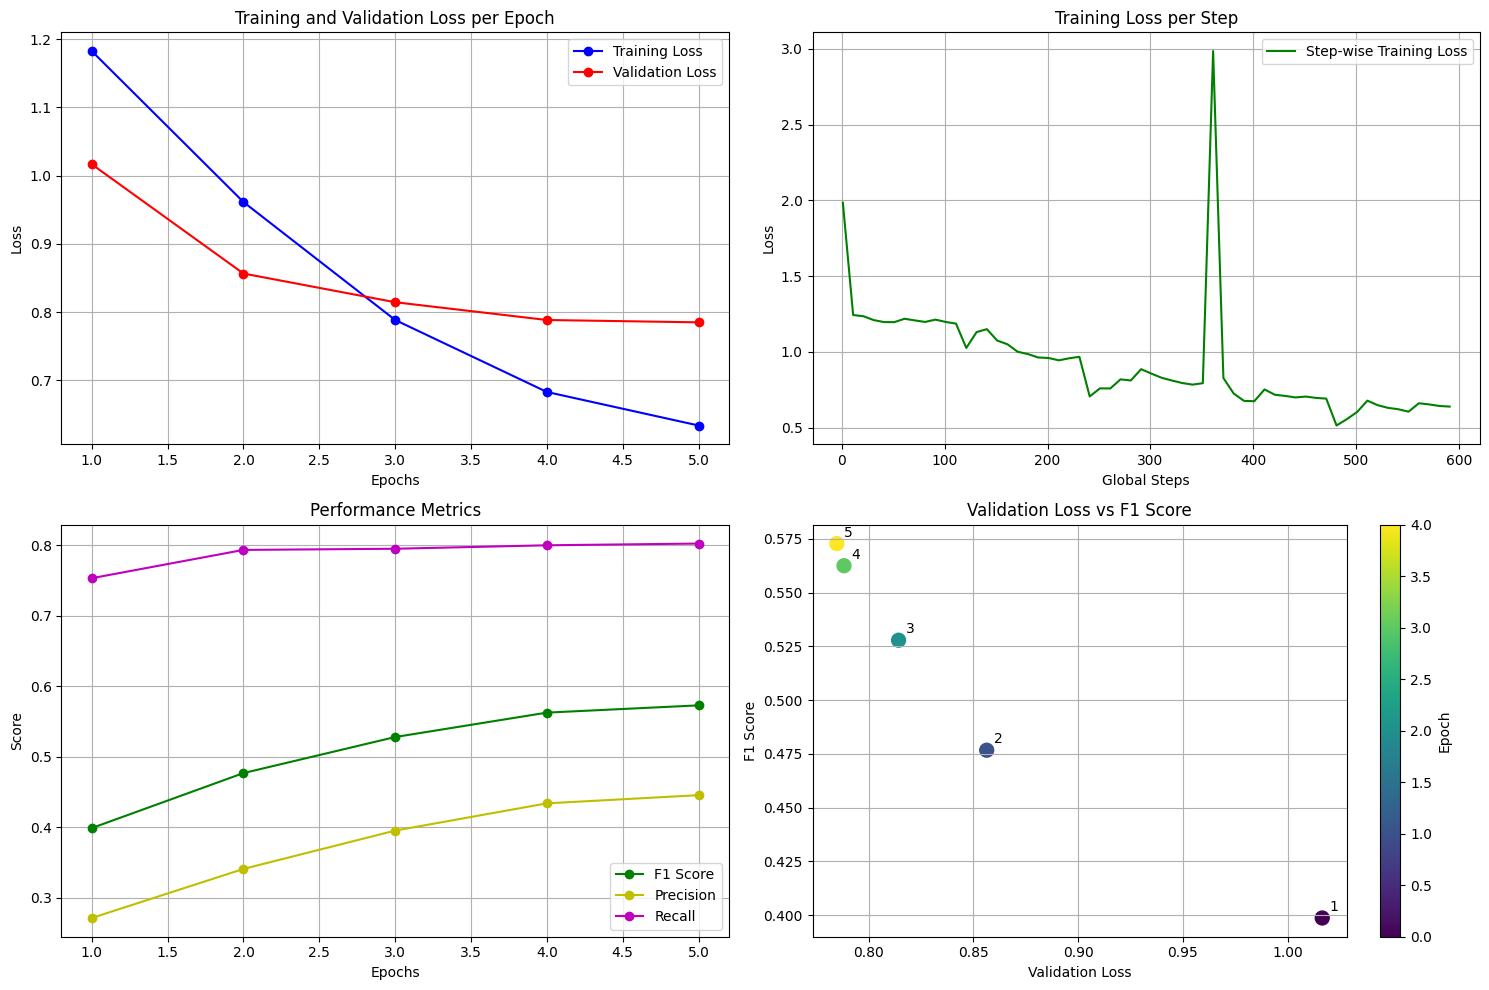


Training Metrics per Epoch:
   Epoch  Train Loss  Val Loss  F1 Score  Precision    Recall
0      1    1.182379  1.016529  0.398698   0.271091  0.753279
1      2    0.961170  0.856400  0.476730   0.340725  0.793443
2      3    0.788350  0.814344  0.527891   0.395112  0.795082
3      4    0.682862  0.788295  0.562536   0.433778  0.800000
4      5    0.633696  0.784862  0.572850   0.445405  0.802459


Predicting Fold 1 Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Fold 1 best F1: 0.5728

Training Fold 2/5
Epoch 1/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 1, Batch 0, Train Loss: 1.1074


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 11, Batch 10, Train Loss: 1.1128


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 21, Batch 20, Train Loss: 1.2090


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 31, Batch 30, Train Loss: 1.2376


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 41, Batch 40, Train Loss: 1.2297


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 51, Batch 50, Train Loss: 1.2458


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 61, Batch 60, Train Loss: 1.2252


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 71, Batch 70, Train Loss: 1.2325


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 81, Batch 80, Train Loss: 1.2240


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 91, Batch 90, Train Loss: 1.2261


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 101, Batch 100, Train Loss: 1.2014


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.15it/s]

  Step 111, Batch 110, Train Loss: 1.2006


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 1 - Training Loss: 1.1914


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.21it/s]

  Validation Batch 0, Val Loss: 1.1809


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.21it/s]

  Validation Batch 10, Val Loss: 0.9893


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.23it/s]

  Validation Batch 20, Val Loss: 1.1054


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.23it/s]


Epoch 1 - Validation Loss: 1.0888
Best Threshold: 0.5
Precision: 0.3243, Recall: 0.7379, F1 Score: 0.4506
Epoch 2/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 121, Batch 0, Train Loss: 0.8946


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 131, Batch 10, Train Loss: 1.0676


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.14it/s]

  Step 141, Batch 20, Train Loss: 1.1543


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 151, Batch 30, Train Loss: 1.0714


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 161, Batch 40, Train Loss: 1.0632


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 171, Batch 50, Train Loss: 1.0332


Training:  51%|█████     | 61/120 [00:53<00:52,  1.13it/s]

  Step 181, Batch 60, Train Loss: 1.0009


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 191, Batch 70, Train Loss: 0.9822


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 201, Batch 80, Train Loss: 0.9628


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.13it/s]

  Step 211, Batch 90, Train Loss: 0.9726


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 221, Batch 100, Train Loss: 0.9786


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 231, Batch 110, Train Loss: 0.9710


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 2 - Training Loss: 0.9538


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.19it/s]

  Validation Batch 0, Val Loss: 1.0622


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.20it/s]

  Validation Batch 10, Val Loss: 0.8137


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.22it/s]

  Validation Batch 20, Val Loss: 0.9356


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


Epoch 2 - Validation Loss: 0.9178
Best Threshold: 0.5
Precision: 0.3402, Recall: 0.7795, F1 Score: 0.4737
Epoch 3/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 241, Batch 0, Train Loss: 0.6799


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 251, Batch 10, Train Loss: 0.7814


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.15it/s]

  Step 261, Batch 20, Train Loss: 0.7330


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.14it/s]

  Step 271, Batch 30, Train Loss: 0.8086


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 281, Batch 40, Train Loss: 0.7815


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 291, Batch 50, Train Loss: 0.7637


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 301, Batch 60, Train Loss: 0.7558


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.14it/s]

  Step 311, Batch 70, Train Loss: 0.7703


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 321, Batch 80, Train Loss: 0.7655


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.15it/s]

  Step 331, Batch 90, Train Loss: 0.7752


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 341, Batch 100, Train Loss: 0.7791


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 351, Batch 110, Train Loss: 0.7742


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 3 - Training Loss: 0.7791


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.16it/s]

  Validation Batch 0, Val Loss: 1.0353


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.15it/s]

  Validation Batch 10, Val Loss: 0.7301


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.16it/s]

  Validation Batch 20, Val Loss: 0.8313


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


Epoch 3 - Validation Loss: 0.8254
Best Threshold: 0.5
Precision: 0.3805, Recall: 0.8078, F1 Score: 0.5173
Epoch 4/5


Training:   1%|          | 1/120 [00:00<01:45,  1.13it/s]

  Step 361, Batch 0, Train Loss: 0.5754


Training:   9%|▉         | 11/120 [00:09<01:36,  1.13it/s]

  Step 371, Batch 10, Train Loss: 0.6953


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 381, Batch 20, Train Loss: 0.6595


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 391, Batch 30, Train Loss: 0.6358


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.13it/s]

  Step 401, Batch 40, Train Loss: 0.6392


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.13it/s]

  Step 411, Batch 50, Train Loss: 0.6781


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 421, Batch 60, Train Loss: 0.6713


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 431, Batch 70, Train Loss: 0.6965


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 441, Batch 80, Train Loss: 0.6819


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 451, Batch 90, Train Loss: 0.6940


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 461, Batch 100, Train Loss: 0.6879


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 471, Batch 110, Train Loss: 0.6792


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 4 - Training Loss: 0.6764


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.19it/s]

  Validation Batch 0, Val Loss: 1.0855


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.18it/s]

  Validation Batch 10, Val Loss: 0.7000


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 0.8313


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 4 - Validation Loss: 0.8209
Best Threshold: 0.5
Precision: 0.4239, Recall: 0.8045, F1 Score: 0.5553
Epoch 5/5


Training:   1%|          | 1/120 [00:00<01:44,  1.13it/s]

  Step 481, Batch 0, Train Loss: 0.6265


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 491, Batch 10, Train Loss: 0.6843


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.15it/s]

  Step 501, Batch 20, Train Loss: 0.6127


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.15it/s]

  Step 511, Batch 30, Train Loss: 0.5944


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 521, Batch 40, Train Loss: 0.5981


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 531, Batch 50, Train Loss: 0.6863


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 541, Batch 60, Train Loss: 0.6587


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 551, Batch 70, Train Loss: 0.6642


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 561, Batch 80, Train Loss: 0.6453


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.15it/s]

  Step 571, Batch 90, Train Loss: 0.6371


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.15it/s]

  Step 581, Batch 100, Train Loss: 0.6314


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 591, Batch 110, Train Loss: 0.6267


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 5 - Training Loss: 0.6198


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.18it/s]

  Validation Batch 0, Val Loss: 1.1244


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.18it/s]

  Validation Batch 10, Val Loss: 0.7050


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 0.8489


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 5 - Validation Loss: 0.8385
Best Threshold: 0.5
Precision: 0.4491, Recall: 0.7962, F1 Score: 0.5743


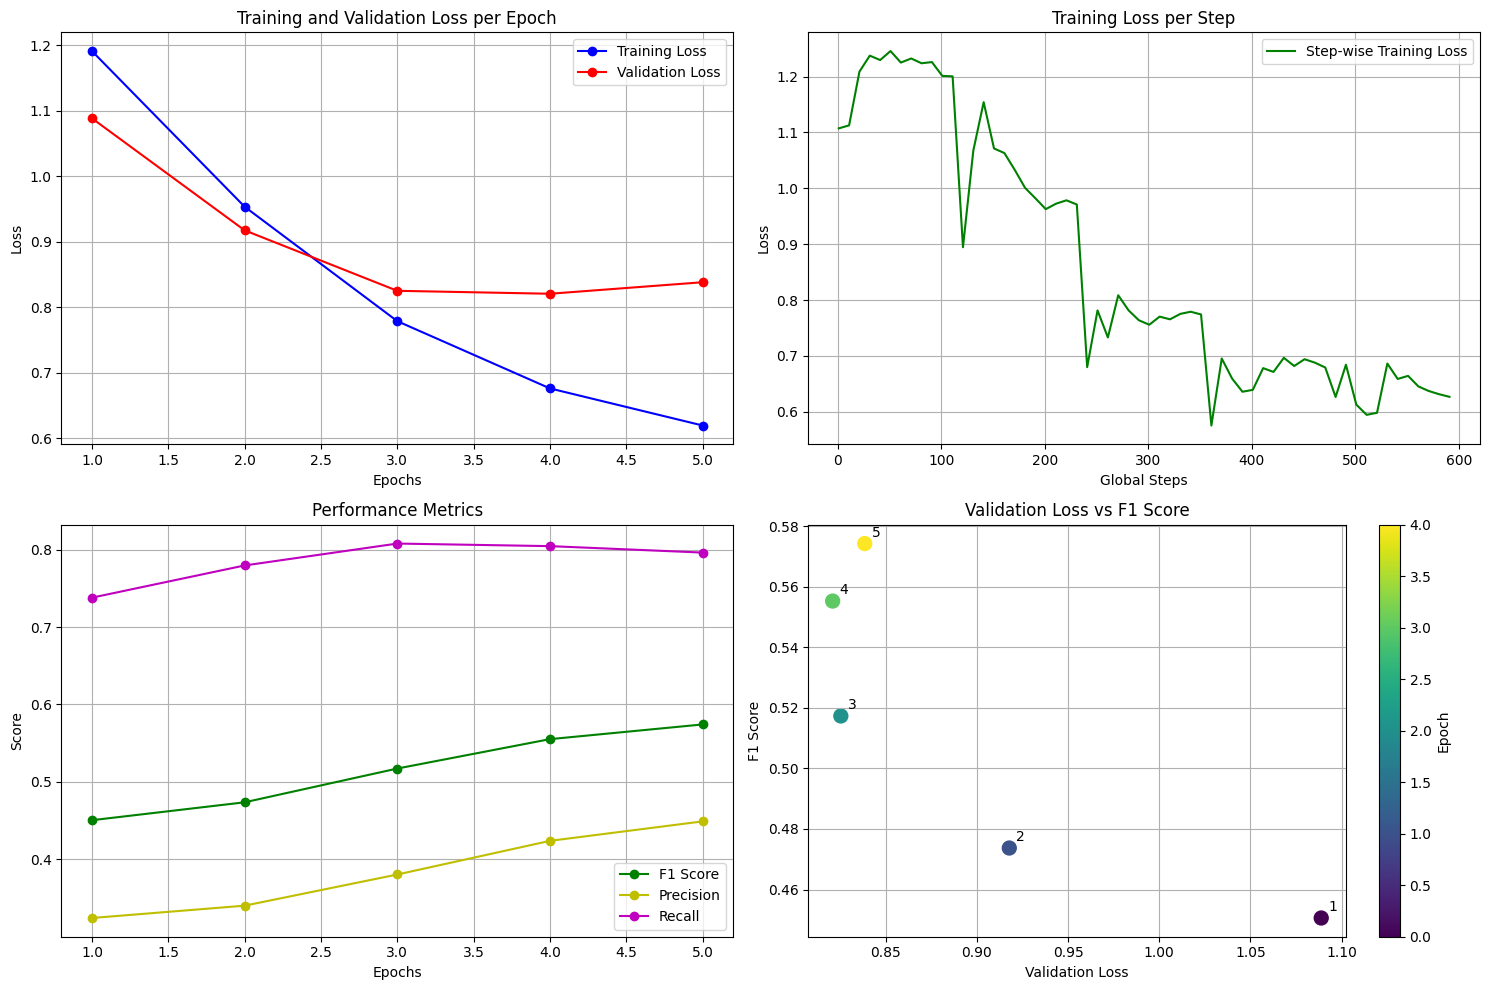


Training Metrics per Epoch:
   Epoch  Train Loss  Val Loss  F1 Score  Precision    Recall
0      1    1.191444  1.088780  0.450597   0.324314  0.737937
1      2    0.953824  0.917772  0.473711   0.340232  0.779534
2      3    0.779090  0.825418  0.517315   0.380486  0.807820
3      4    0.676404  0.820932  0.555268   0.423937  0.804493
4      5    0.619794  0.838522  0.574257   0.449085  0.796173


Predicting Fold 2 Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Fold 2 best F1: 0.5743

Training Fold 3/5
Epoch 1/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 1, Batch 0, Train Loss: 0.9312


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 11, Batch 10, Train Loss: 1.1650


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 21, Batch 20, Train Loss: 1.2680


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.13it/s]

  Step 31, Batch 30, Train Loss: 1.2713


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 41, Batch 40, Train Loss: 1.2507


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 51, Batch 50, Train Loss: 1.2340


Training:  51%|█████     | 61/120 [00:53<00:52,  1.13it/s]

  Step 61, Batch 60, Train Loss: 1.2176


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 71, Batch 70, Train Loss: 1.2411


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 81, Batch 80, Train Loss: 1.2304


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.15it/s]

  Step 91, Batch 90, Train Loss: 1.2265


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.15it/s]

  Step 101, Batch 100, Train Loss: 1.2185


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.15it/s]

  Step 111, Batch 110, Train Loss: 1.1975


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 1 - Training Loss: 1.2047


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.21it/s]

  Validation Batch 0, Val Loss: 1.0211


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.19it/s]

  Validation Batch 10, Val Loss: 1.1099


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.19it/s]

  Validation Batch 20, Val Loss: 1.2063


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


Epoch 1 - Validation Loss: 1.2041
Best Threshold: 0.5
Precision: 0.2593, Recall: 0.7646, F1 Score: 0.3873
Epoch 2/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 121, Batch 0, Train Loss: 0.9591


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 131, Batch 10, Train Loss: 1.0514


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 141, Batch 20, Train Loss: 1.0185


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 151, Batch 30, Train Loss: 0.9889


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 161, Batch 40, Train Loss: 1.0418


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 171, Batch 50, Train Loss: 1.0767


Training:  51%|█████     | 61/120 [00:53<00:52,  1.13it/s]

  Step 181, Batch 60, Train Loss: 1.0554


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 191, Batch 70, Train Loss: 1.0755


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.13it/s]

  Step 201, Batch 80, Train Loss: 1.0918


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 211, Batch 90, Train Loss: 1.0653


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 221, Batch 100, Train Loss: 1.0460


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.13it/s]

  Step 231, Batch 110, Train Loss: 1.0224


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 2 - Training Loss: 1.0042


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.17it/s]

  Validation Batch 0, Val Loss: 0.7642


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 0.8821


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.18it/s]

  Validation Batch 20, Val Loss: 0.9927


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 2 - Validation Loss: 0.9829
Best Threshold: 0.5
Precision: 0.3998, Recall: 0.7805, F1 Score: 0.5288
Epoch 3/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 241, Batch 0, Train Loss: 1.0627


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 251, Batch 10, Train Loss: 0.8011


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.14it/s]

  Step 261, Batch 20, Train Loss: 0.7527


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 271, Batch 30, Train Loss: 0.9029


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 281, Batch 40, Train Loss: 0.8461


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 291, Batch 50, Train Loss: 0.8144


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 301, Batch 60, Train Loss: 0.8112


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.14it/s]

  Step 311, Batch 70, Train Loss: 0.8017


Training:  68%|██████▊   | 81/120 [01:11<00:33,  1.15it/s]

  Step 321, Batch 80, Train Loss: 0.7918


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.13it/s]

  Step 331, Batch 90, Train Loss: 0.7874


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 341, Batch 100, Train Loss: 0.7933


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 351, Batch 110, Train Loss: 0.7824


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 3 - Training Loss: 0.8030


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.21it/s]

  Validation Batch 0, Val Loss: 0.6741


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.18it/s]

  Validation Batch 10, Val Loss: 0.7795


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.17it/s]

  Validation Batch 20, Val Loss: 0.9010


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


Epoch 3 - Validation Loss: 0.8914
Best Threshold: 0.5
Precision: 0.4155, Recall: 0.7909, F1 Score: 0.5448
Epoch 4/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 361, Batch 0, Train Loss: 0.7440


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 371, Batch 10, Train Loss: 1.1180


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 381, Batch 20, Train Loss: 0.8823


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.15it/s]

  Step 391, Batch 30, Train Loss: 0.7790


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 401, Batch 40, Train Loss: 0.7463


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.15it/s]

  Step 411, Batch 50, Train Loss: 0.7192


Training:  51%|█████     | 61/120 [00:53<00:51,  1.15it/s]

  Step 421, Batch 60, Train Loss: 0.7022


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 431, Batch 70, Train Loss: 0.6956


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 441, Batch 80, Train Loss: 0.7270


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 451, Batch 90, Train Loss: 0.7132


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 461, Batch 100, Train Loss: 0.7166


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 471, Batch 110, Train Loss: 0.7061


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 4 - Training Loss: 0.6978


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.20it/s]

  Validation Batch 0, Val Loss: 0.6326


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 0.7652


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.18it/s]

  Validation Batch 20, Val Loss: 0.8962


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


Epoch 4 - Validation Loss: 0.8807
Best Threshold: 0.5
Precision: 0.4356, Recall: 0.7861, F1 Score: 0.5606
Epoch 5/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 481, Batch 0, Train Loss: 0.6805


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 491, Batch 10, Train Loss: 0.5947


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 501, Batch 20, Train Loss: 0.7339


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.14it/s]

  Step 511, Batch 30, Train Loss: 0.7001


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 521, Batch 40, Train Loss: 0.6543


Training:  42%|████▎     | 51/120 [00:44<01:01,  1.13it/s]

  Step 531, Batch 50, Train Loss: 0.6338


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 541, Batch 60, Train Loss: 0.6544


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 551, Batch 70, Train Loss: 0.6849


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.13it/s]

  Step 561, Batch 80, Train Loss: 0.6750


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 571, Batch 90, Train Loss: 0.6610


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 581, Batch 100, Train Loss: 0.6488


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 591, Batch 110, Train Loss: 0.6406


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 5 - Training Loss: 0.6408


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.21it/s]

  Validation Batch 0, Val Loss: 0.6213


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.17it/s]

  Validation Batch 10, Val Loss: 0.7625


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.19it/s]

  Validation Batch 20, Val Loss: 0.9012


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 5 - Validation Loss: 0.8918
Best Threshold: 0.5
Precision: 0.4408, Recall: 0.7781, F1 Score: 0.5628


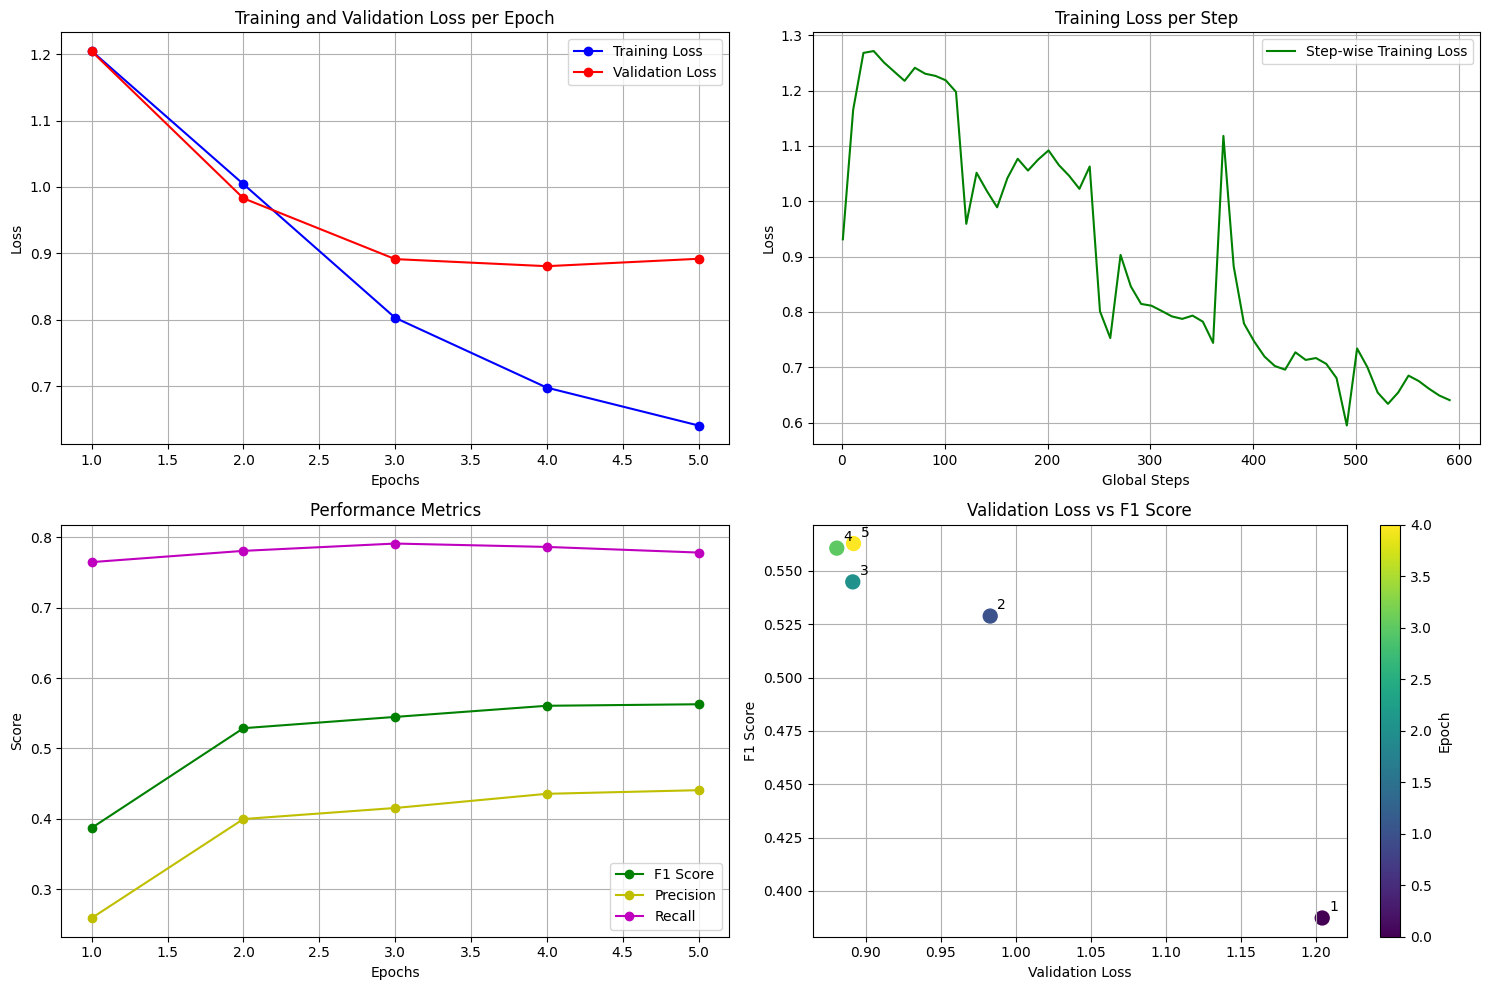


Training Metrics per Epoch:
   Epoch  Train Loss  Val Loss  F1 Score  Precision    Recall
0      1    1.204684  1.204135  0.387305   0.259339  0.764565
1      2    1.004219  0.982918  0.528792   0.399836  0.780527
2      3    0.802975  0.891358  0.544805   0.415514  0.790902
3      4    0.697805  0.880712  0.560615   0.435648  0.786113
4      5    0.640770  0.891844  0.562771   0.440778  0.778132


Predicting Fold 3 Validation: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


Fold 3 best F1: 0.5628

Training Fold 4/5
Epoch 1/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 1, Batch 0, Train Loss: 2.0956


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 11, Batch 10, Train Loss: 1.1989


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 21, Batch 20, Train Loss: 1.1916


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 31, Batch 30, Train Loss: 1.1878


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 41, Batch 40, Train Loss: 1.1959


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 51, Batch 50, Train Loss: 1.2093


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 61, Batch 60, Train Loss: 1.2149


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 71, Batch 70, Train Loss: 1.1924


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 81, Batch 80, Train Loss: 1.1879


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 91, Batch 90, Train Loss: 1.1952


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 101, Batch 100, Train Loss: 1.2043


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.13it/s]

  Step 111, Batch 110, Train Loss: 1.1870


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 1 - Training Loss: 1.1674


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.11it/s]

  Validation Batch 0, Val Loss: 1.2114


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.19it/s]

  Validation Batch 10, Val Loss: 1.1534


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 1.0640


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 1 - Validation Loss: 1.0371
Best Threshold: 0.5
Precision: 0.3008, Recall: 0.7519, F1 Score: 0.4297
Epoch 2/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 121, Batch 0, Train Loss: 1.0709


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 131, Batch 10, Train Loss: 0.9329


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 141, Batch 20, Train Loss: 0.8984


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 151, Batch 30, Train Loss: 0.8912


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 161, Batch 40, Train Loss: 0.9021


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 171, Batch 50, Train Loss: 0.9541


Training:  51%|█████     | 61/120 [00:53<00:51,  1.15it/s]

  Step 181, Batch 60, Train Loss: 0.9404


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.15it/s]

  Step 191, Batch 70, Train Loss: 0.9287


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.15it/s]

  Step 201, Batch 80, Train Loss: 0.9340


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 211, Batch 90, Train Loss: 0.9262


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 221, Batch 100, Train Loss: 0.9084


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 231, Batch 110, Train Loss: 0.9532


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 2 - Training Loss: 0.9422


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.16it/s]

  Validation Batch 0, Val Loss: 1.0223


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.19it/s]

  Validation Batch 10, Val Loss: 1.0992


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.18it/s]

  Validation Batch 20, Val Loss: 0.9536


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 2 - Validation Loss: 0.9140
Best Threshold: 0.5
Precision: 0.3469, Recall: 0.7693, F1 Score: 0.4782
Epoch 3/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 241, Batch 0, Train Loss: 0.6661


Training:   9%|▉         | 11/120 [00:09<01:36,  1.13it/s]

  Step 251, Batch 10, Train Loss: 0.7635


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.14it/s]

  Step 261, Batch 20, Train Loss: 0.8405


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 271, Batch 30, Train Loss: 0.8105


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 281, Batch 40, Train Loss: 0.7787


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.15it/s]

  Step 291, Batch 50, Train Loss: 0.7622


Training:  51%|█████     | 61/120 [00:53<00:51,  1.15it/s]

  Step 301, Batch 60, Train Loss: 0.8161


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.14it/s]

  Step 311, Batch 70, Train Loss: 0.8044


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 321, Batch 80, Train Loss: 0.7912


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 331, Batch 90, Train Loss: 0.8021


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.15it/s]

  Step 341, Batch 100, Train Loss: 0.7878


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 351, Batch 110, Train Loss: 0.7772


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 3 - Training Loss: 0.7654


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.15it/s]

  Validation Batch 0, Val Loss: 0.9813


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.19it/s]

  Validation Batch 10, Val Loss: 1.1415


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.19it/s]

  Validation Batch 20, Val Loss: 0.9479


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 3 - Validation Loss: 0.8874
Best Threshold: 0.5
Precision: 0.3991, Recall: 0.7693, F1 Score: 0.5255
Epoch 4/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 361, Batch 0, Train Loss: 0.5907


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 371, Batch 10, Train Loss: 0.6450


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 381, Batch 20, Train Loss: 0.6442


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.13it/s]

  Step 391, Batch 30, Train Loss: 0.6566


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.13it/s]

  Step 401, Batch 40, Train Loss: 0.6354


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 411, Batch 50, Train Loss: 0.6636


Training:  51%|█████     | 61/120 [00:53<00:52,  1.13it/s]

  Step 421, Batch 60, Train Loss: 0.6520


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 431, Batch 70, Train Loss: 0.6410


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 441, Batch 80, Train Loss: 0.6421


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 451, Batch 90, Train Loss: 0.6630


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 461, Batch 100, Train Loss: 0.6528


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 471, Batch 110, Train Loss: 0.6480


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 4 - Training Loss: 0.6539


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.13it/s]

  Validation Batch 0, Val Loss: 0.9456


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.21it/s]

  Validation Batch 10, Val Loss: 1.1728


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 0.9546


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 4 - Validation Loss: 0.8758
Best Threshold: 0.5
Precision: 0.4193, Recall: 0.7610, F1 Score: 0.5407
Epoch 5/5


Training:   1%|          | 1/120 [00:00<01:45,  1.13it/s]

  Step 481, Batch 0, Train Loss: 0.5871


Training:   9%|▉         | 11/120 [00:09<01:35,  1.15it/s]

  Step 491, Batch 10, Train Loss: 0.5760


Training:  18%|█▊        | 21/120 [00:18<01:26,  1.14it/s]

  Step 501, Batch 20, Train Loss: 0.5563


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.14it/s]

  Step 511, Batch 30, Train Loss: 0.5586


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 521, Batch 40, Train Loss: 0.5689


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.15it/s]

  Step 531, Batch 50, Train Loss: 0.5635


Training:  51%|█████     | 61/120 [00:53<00:52,  1.13it/s]

  Step 541, Batch 60, Train Loss: 0.6161


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 551, Batch 70, Train Loss: 0.6066


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 561, Batch 80, Train Loss: 0.5990


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 571, Batch 90, Train Loss: 0.5994


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 581, Batch 100, Train Loss: 0.5930


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 591, Batch 110, Train Loss: 0.5895


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 5 - Training Loss: 0.6019


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.14it/s]

  Validation Batch 0, Val Loss: 0.9971


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.18it/s]

  Validation Batch 10, Val Loss: 1.1926


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.17it/s]

  Validation Batch 20, Val Loss: 0.9669


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 5 - Validation Loss: 0.8866
Best Threshold: 0.5
Precision: 0.4378, Recall: 0.7618, F1 Score: 0.5560


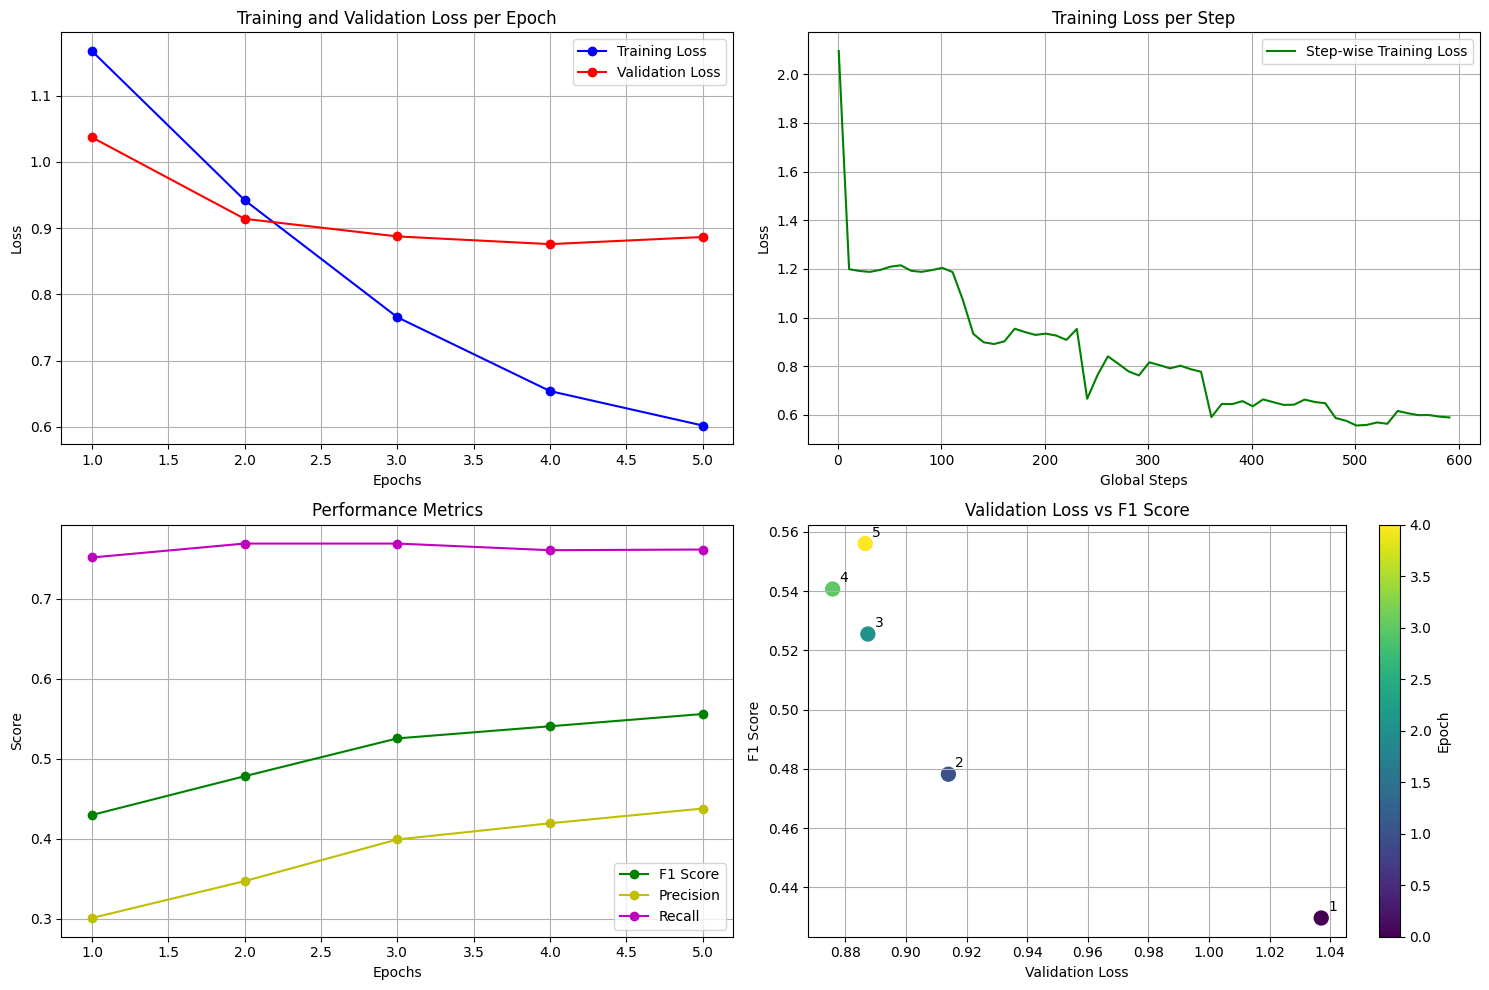


Training Metrics per Epoch:
   Epoch  Train Loss  Val Loss  F1 Score  Precision    Recall
0      1    1.167365  1.037064  0.429689   0.300797  0.751867
1      2    0.942205  0.913999  0.478205   0.346931  0.769295
2      3    0.765429  0.887434  0.525510   0.399053  0.769295
3      4    0.653900  0.875804  0.540684   0.419296  0.760996
4      5    0.601901  0.886555  0.556027   0.437768  0.761826


Predicting Fold 4 Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Fold 4 best F1: 0.5560

Training Fold 5/5
Epoch 1/5


Training:   1%|          | 1/120 [00:00<01:45,  1.13it/s]

  Step 1, Batch 0, Train Loss: 1.1138


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 11, Batch 10, Train Loss: 1.2312


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.13it/s]

  Step 21, Batch 20, Train Loss: 1.2759


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.13it/s]

  Step 31, Batch 30, Train Loss: 1.2571


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.13it/s]

  Step 41, Batch 40, Train Loss: 1.2452


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 51, Batch 50, Train Loss: 1.2172


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 61, Batch 60, Train Loss: 1.1990


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 71, Batch 70, Train Loss: 1.1880


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 81, Batch 80, Train Loss: 1.1689


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.13it/s]

  Step 91, Batch 90, Train Loss: 1.2035


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 101, Batch 100, Train Loss: 1.1950


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 111, Batch 110, Train Loss: 1.1842


Training: 100%|██████████| 120/120 [01:45<00:00,  1.14it/s]


Epoch 1 - Training Loss: 1.1974


Validation:   3%|▎         | 1/30 [00:00<00:08,  3.23it/s]

  Validation Batch 0, Val Loss: 0.7823


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 1.2369


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 1.1238


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 1 - Validation Loss: 1.2210
Best Threshold: 0.5
Precision: 0.2827, Recall: 0.7722, F1 Score: 0.4139
Epoch 2/5


Training:   1%|          | 1/120 [00:00<01:44,  1.13it/s]

  Step 121, Batch 0, Train Loss: 0.9841


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 131, Batch 10, Train Loss: 0.9717


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.14it/s]

  Step 141, Batch 20, Train Loss: 1.3050


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.14it/s]

  Step 151, Batch 30, Train Loss: 1.2671


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 161, Batch 40, Train Loss: 1.1773


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 171, Batch 50, Train Loss: 1.1215


Training:  51%|█████     | 61/120 [00:53<00:51,  1.15it/s]

  Step 181, Batch 60, Train Loss: 1.0789


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.13it/s]

  Step 191, Batch 70, Train Loss: 1.0523


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.13it/s]

  Step 201, Batch 80, Train Loss: 1.0248


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 211, Batch 90, Train Loss: 1.0032


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.14it/s]

  Step 221, Batch 100, Train Loss: 0.9936


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 231, Batch 110, Train Loss: 0.9819


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 2 - Training Loss: 0.9728


Validation:   3%|▎         | 1/30 [00:00<00:09,  3.20it/s]

  Validation Batch 0, Val Loss: 0.6321


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.15it/s]

  Validation Batch 10, Val Loss: 1.1479


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.21it/s]

  Validation Batch 20, Val Loss: 0.9941


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


Epoch 2 - Validation Loss: 1.0496
Best Threshold: 0.5
Precision: 0.3273, Recall: 0.7919, F1 Score: 0.4632
Epoch 3/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 241, Batch 0, Train Loss: 0.8119


Training:   9%|▉         | 11/120 [00:09<01:36,  1.13it/s]

  Step 251, Batch 10, Train Loss: 0.7610


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.13it/s]

  Step 261, Batch 20, Train Loss: 0.7431


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.13it/s]

  Step 271, Batch 30, Train Loss: 0.7558


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 281, Batch 40, Train Loss: 0.7369


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 291, Batch 50, Train Loss: 0.7318


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 301, Batch 60, Train Loss: 0.8782


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 311, Batch 70, Train Loss: 0.8870


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.14it/s]

  Step 321, Batch 80, Train Loss: 0.8743


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 331, Batch 90, Train Loss: 0.8555


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.13it/s]

  Step 341, Batch 100, Train Loss: 0.8368


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.13it/s]

  Step 351, Batch 110, Train Loss: 0.8225


Training: 100%|██████████| 120/120 [01:44<00:00,  1.14it/s]


Epoch 3 - Training Loss: 0.8097


Validation:   3%|▎         | 1/30 [00:00<00:08,  3.23it/s]

  Validation Batch 0, Val Loss: 0.5292


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.15it/s]

  Validation Batch 10, Val Loss: 1.0909


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.20it/s]

  Validation Batch 20, Val Loss: 0.9261


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 3 - Validation Loss: 0.9868
Best Threshold: 0.5
Precision: 0.3876, Recall: 0.7944, F1 Score: 0.5210
Epoch 4/5


Training:   1%|          | 1/120 [00:00<01:44,  1.14it/s]

  Step 361, Batch 0, Train Loss: 0.6499


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 371, Batch 10, Train Loss: 0.8313


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.14it/s]

  Step 381, Batch 20, Train Loss: 0.7244


Training:  26%|██▌       | 31/120 [00:27<01:17,  1.14it/s]

  Step 391, Batch 30, Train Loss: 0.6893


Training:  34%|███▍      | 41/120 [00:35<01:09,  1.14it/s]

  Step 401, Batch 40, Train Loss: 0.6647


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 411, Batch 50, Train Loss: 0.6475


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 421, Batch 60, Train Loss: 0.6458


Training:  59%|█████▉    | 71/120 [01:02<00:42,  1.14it/s]

  Step 431, Batch 70, Train Loss: 0.6850


Training:  68%|██████▊   | 81/120 [01:10<00:34,  1.14it/s]

  Step 441, Batch 80, Train Loss: 0.6788


Training:  76%|███████▌  | 91/120 [01:19<00:25,  1.14it/s]

  Step 451, Batch 90, Train Loss: 0.6711


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.15it/s]

  Step 461, Batch 100, Train Loss: 0.7053


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.14it/s]

  Step 471, Batch 110, Train Loss: 0.6942


Training: 100%|██████████| 120/120 [01:44<00:00,  1.15it/s]


Epoch 4 - Training Loss: 0.6907


Validation:   3%|▎         | 1/30 [00:00<00:08,  3.26it/s]

  Validation Batch 0, Val Loss: 0.4797


Validation:  37%|███▋      | 11/30 [00:03<00:05,  3.17it/s]

  Validation Batch 10, Val Loss: 1.1129


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.22it/s]

  Validation Batch 20, Val Loss: 0.9263


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Epoch 4 - Validation Loss: 1.0053
Best Threshold: 0.5
Precision: 0.4203, Recall: 0.7714, F1 Score: 0.5441
Epoch 5/5


Training:   1%|          | 1/120 [00:00<01:43,  1.15it/s]

  Step 481, Batch 0, Train Loss: 0.5297


Training:   9%|▉         | 11/120 [00:09<01:35,  1.14it/s]

  Step 491, Batch 10, Train Loss: 0.5508


Training:  18%|█▊        | 21/120 [00:18<01:27,  1.13it/s]

  Step 501, Batch 20, Train Loss: 0.7803


Training:  26%|██▌       | 31/120 [00:27<01:18,  1.14it/s]

  Step 511, Batch 30, Train Loss: 0.7111


Training:  34%|███▍      | 41/120 [00:36<01:09,  1.14it/s]

  Step 521, Batch 40, Train Loss: 0.6733


Training:  42%|████▎     | 51/120 [00:44<01:00,  1.14it/s]

  Step 531, Batch 50, Train Loss: 0.6593


Training:  51%|█████     | 61/120 [00:53<00:51,  1.14it/s]

  Step 541, Batch 60, Train Loss: 0.6386


Training:  59%|█████▉    | 71/120 [01:02<00:43,  1.14it/s]

  Step 551, Batch 70, Train Loss: 0.6680


Training:  68%|██████▊   | 81/120 [01:11<00:34,  1.13it/s]

  Step 561, Batch 80, Train Loss: 0.6522


Training:  76%|███████▌  | 91/120 [01:20<00:25,  1.14it/s]

  Step 571, Batch 90, Train Loss: 0.6375


Training:  84%|████████▍ | 101/120 [01:28<00:16,  1.13it/s]

  Step 581, Batch 100, Train Loss: 0.6285


Training:  92%|█████████▎| 111/120 [01:37<00:07,  1.13it/s]

  Step 591, Batch 110, Train Loss: 0.6390


Training: 100%|██████████| 120/120 [01:45<00:00,  1.14it/s]


Epoch 5 - Training Loss: 0.6348


Validation:   3%|▎         | 1/30 [00:00<00:08,  3.24it/s]

  Validation Batch 0, Val Loss: 0.4604


Validation:  37%|███▋      | 11/30 [00:03<00:06,  3.16it/s]

  Validation Batch 10, Val Loss: 1.1209


Validation:  70%|███████   | 21/30 [00:06<00:02,  3.21it/s]

  Validation Batch 20, Val Loss: 0.9227


Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Epoch 5 - Validation Loss: 0.9923
Best Threshold: 0.5
Precision: 0.4285, Recall: 0.7738, F1 Score: 0.5516


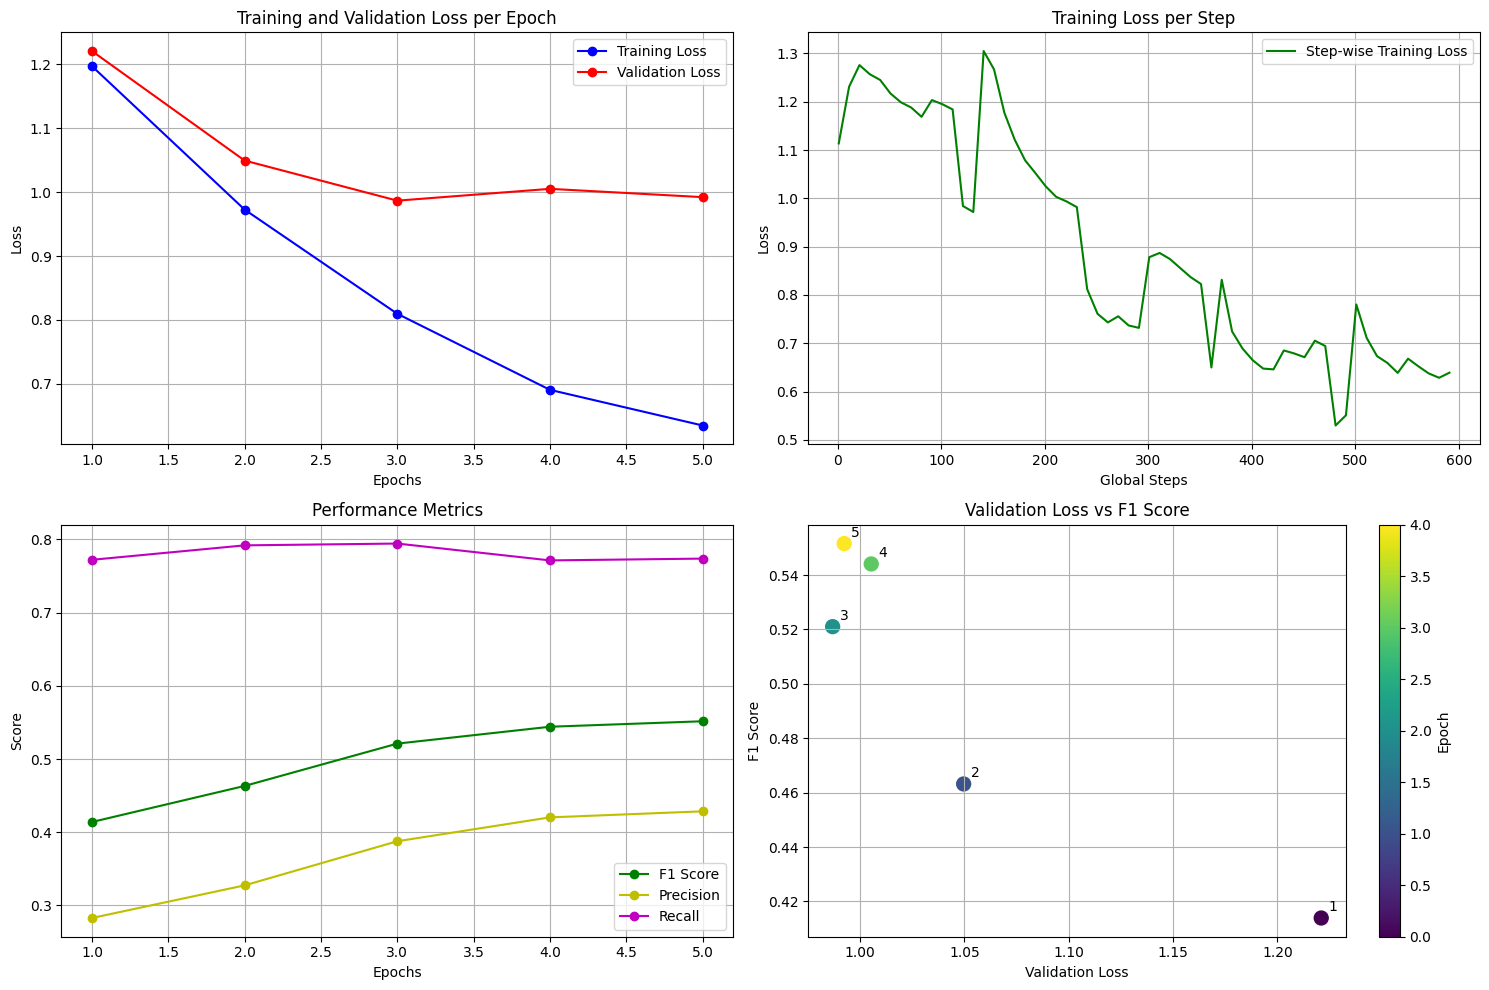


Training Metrics per Epoch:
   Epoch  Train Loss  Val Loss  F1 Score  Precision    Recall
0      1    1.197386  1.220999  0.413930   0.282746  0.772204
1      2    0.972840  1.049606  0.463203   0.327328  0.791941
2      3    0.809745  0.986805  0.521036   0.387640  0.794408
3      4    0.690664  1.005299  0.544084   0.420251  0.771382
4      5    0.634844  0.992325  0.551583   0.428506  0.773849


Predicting Fold 5 Validation: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]

Fold 5 best F1: 0.5516

Average best F1 across 5 folds: 0.5635


In [18]:
# Run k-fold training
print("Starting 5-fold cross-validation training...")
(
    fold_data_list,
    fold_models,
    fold_tokenizers,
    fold_thresholds,
    fold_metrics,
    fold_val_preds,
    fold_val_indices
) = train_with_kfold(
    data=data,
    num_epochs=5,
    batch_size=16,
    learning_rate=3e-5,
    log_steps=10,
    n_splits=5
)

In [19]:
# save_dir = "bert-sep-cv"
# save_dir = "moviebert-sep-cv"
save_dir = "berthidden-sep-cv"

!mkdir -p $save_dir

for fold, (data, model) in enumerate(zip(fold_data_list, fold_models)):
    data_path = f"{save_dir}/data_fold{fold}.pkl"
    with open(data_path, 'wb') as f:
        pickle.dump(data, f)
    
    model_path = f"{save_dir}/model_fold{fold}.pth"
    torch.save(model.state_dict(), model_path)

In [ ]:
# Load saved model

save_dir = "moviebert-sep-cv"

fold_data_list = []
fold_models = []
fold_tokenizers = []
fold_thresholds = []

for fold in range(5):
    data_path = f"{save_dir}/data_fold{fold}.pkl"
    with open(data_path, 'rb') as f:
        fold_data_list.append(pickle.load(f))
    
    model_path = f"{save_dir}/model_fold{fold}.pth"
    state_dict = torch.load(model_path)
    model = GenreClassifier(n_genres=20)
    model = model.to(device)
    model.load_state_dict(state_dict)
    fold_models.append(model)

    fold_tokenizers.append(tokenizer)
    fold_thresholds.append(0.5)

# Conformal Prediction

## Calibration

In [20]:
# ===== Functions for conformal prediction =====
def compute_calibration_scores(model, data, tokenizer, batch_size=16):
    model.eval()
    
    cal_dataset = MovieDataset(
        texts=data['val_texts'],
        labels=data['val_labels'],
        tokenizer=tokenizer
    )
    
    cal_data_loader = DataLoader(
        cal_dataset,
        batch_size=batch_size
    )
    
    nonconformity_scores = []
    nonconformity_scores_by_class = [[] for _ in range(20)]
    
    with torch.no_grad():
        for batch in tqdm(cal_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            
            # Calculate nonconformity scores for each sample and class
            # For label=1, score is 1-prob; for label=0, score is prob
            # nonconf_score = torch.where(labels == 1, 1 - probs, probs)
            # nonconformity_scores.append(nonconf_score.cpu().numpy())

            unused_index_value = 2  # must be > 1
            nonconf_score = torch.where(labels == 1, 1 - probs, unused_index_value)
            # nonconf_score = 1 - probs[(labels == 1)]  # does not work as intended
            nonconf_score = nonconf_score.cpu().numpy().T  # classes x batch
            # print(nonconf_score.shape)
            for class_idx in range(20):
                class_nonconf_score = nonconf_score[class_idx][nonconf_score[class_idx] < unused_index_value]
                nonconformity_scores_by_class[class_idx] += list(class_nonconf_score)
    
    # nonconformity_scores = np.vstack(nonconformity_scores)
    # return nonconformity_scores    

    return nonconformity_scores_by_class

In [21]:
# print("Computing calibration scores for conformal prediction...")
# nonconformity_scores = compute_calibration_scores(model, data, tokenizer)

In [22]:
print("Computing calibration scores for conformal prediction...")
fold_nonconformity_scores_list = []
for fold, (data, model, tokenizer) in enumerate(zip(fold_data_list, fold_models, fold_tokenizers)):
    nonconformity_scores = compute_calibration_scores(model, data, tokenizer)
    fold_nonconformity_scores_list.append(nonconformity_scores)

Computing calibration scores for conformal prediction...


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


## Best Alpha

In [23]:
def predict_with_conformal(model, data, tokenizer, nonconformity_scores, threshold=0.5, alpha=0.1, batch_size=16):
    # Create dataset and dataloader for test data
    test_dataset = MovieDataset(
        texts=data['test_texts'],
        tokenizer=tokenizer
    )
    
    test_data_loader = DataLoader(
        test_dataset,
        batch_size=batch_size
    )
    
    # Calculate quantile for conformal prediction
    # q = np.quantile(nonconformity_scores, 1 - alpha, axis=0)
    q_by_class = []
    for class_idx, scores in enumerate(nonconformity_scores):
        if scores:
            q_by_class.append(float(np.quantile(np.array(scores), 1 - alpha)))
        else:
            # scores=[] if there were no correct predictions
            print(f"No scores on class {class_idx}")
            q_by_class.append(0)
    q = np.array(q_by_class)

    model.eval()
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(test_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            all_probs.append(probs.cpu().numpy())
    
    all_probs = np.vstack(all_probs)
    
    # Construct conformal prediction sets
    # Include genre in set if probability >= (1-q)
    conformal_preds = (all_probs >= (1 - q)).astype(int)
    
    # Also create standard predictions with the best threshold
    standard_preds = (all_probs > threshold).astype(int)
    
    # Ensure each movie has at least one genre
    # If no genre is predicted, assign 1 to ALL genres
    for i in range(conformal_preds.shape[0]):
        if np.sum(conformal_preds[i]) == 0:
            # Set all genres to 1
            conformal_preds[i, :] = 1
    
    # Create submission dataframe
    submission = pd.DataFrame({'id': data['test_ids']})
    for i, genre in enumerate(genre_columns):
        submission[genre] = conformal_preds[:, i]
    
    return submission, all_probs, q, standard_preds


# ===== Evaluation functions based on the competition metric =====
def evaluate_conformal_prediction(model, data, tokenizer, nonconformity_scores, threshold, alpha=0.1):
    """
    Evaluate the model using the competition metric:
    Metric = 0.5 * (Coverage + Length)
    
    Coverage = Indicator[Average coverage >= 0.9]
    Length = 1 - Average set size / 20
    
    The ideal prediction set should have coverage >= 0.9 with minimal size.
    """
    # Split the validation data for evaluation
    val_texts, eval_texts, val_labels, eval_labels = train_test_split(
        data['val_texts'], data['val_labels'], test_size=0.5, random_state=42)
    
    # Update data dictionary for calibration
    cal_data = {
        'train_texts': data['train_texts'],
        'val_texts': val_texts,
        'train_labels': data['train_labels'],
        'val_labels': val_labels,
        'test_texts': eval_texts,
        'test_ids': np.arange(len(eval_texts)),
        'genre_columns': genre_columns
    }
    
    # Calculate calibration scores on the validation set
    cal_scores = compute_calibration_scores(model, cal_data, tokenizer)
    
    # Predict with conformal prediction on the evaluation set
    submission, probs, q, standard_preds = predict_with_conformal(model, cal_data, tokenizer, cal_scores, threshold, alpha)
    
    # Calculate coverage (fraction of instances where true labels are in the prediction set)
    conformal_preds = submission.iloc[:, 1:].values
    true_labels = eval_labels
    
    # Calculate coverage for each sample
    coverages = []
    set_sizes = []
    
    for i in range(len(true_labels)):
        # Check if all true genres are in the prediction set
        # Y^(i) ⊆ S^(i)
        covered = True
        for j in range(len(true_labels[i])):
            if true_labels[i][j] == 1 and conformal_preds[i][j] == 0:
                covered = False
                break
        
        coverages.append(covered)
        
        # Calculate set size |S^(i)|
        set_size = np.sum(conformal_preds[i])
        set_sizes.append(set_size)
    
    # Calculate average coverage
    avg_coverage = np.mean(coverages)
    # Calculate average set size
    avg_set_size = np.mean(set_sizes)
    
    # Calculate the final metrics
    coverage_indicator = 1 if avg_coverage >= 0.9 else 0
    length_score = 1 - (avg_set_size / 20)
    
    # Final metric
    final_metric = 0.5 * (coverage_indicator + length_score)
    
    print(f"Evaluation Results:")
    print(f"  Average Coverage: {avg_coverage:.4f}")
    print(f"  Coverage Indicator (≥0.9): {coverage_indicator}")
    print(f"  Average Set Size: {avg_set_size:.4f}")
    print(f"  Length Score: {length_score:.4f}")
    print(f"  Final Metric: {final_metric:.4f}")
    
    # Also evaluate standard predictions
    precision = precision_score(true_labels, standard_preds, average='micro', zero_division=0)
    recall = recall_score(true_labels, standard_preds, average='micro', zero_division=0)
    f1 = f1_score(true_labels, standard_preds, average='micro', zero_division=0)
    
    print(f"Standard Prediction Metrics:")
    print(f"  Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    
    return final_metric, coverage_indicator, length_score, q, conformal_preds, true_labels

def find_optimal_alpha(model, data, tokenizer, nonconformity_scores, threshold, alpha_values):
    """
    Find the optimal alpha value for conformal prediction by evaluating
    different alpha values using the competition metric.
    """
    results = []
    best_metric = -1
    best_alpha = None
    best_q = None
    
    print("Finding optimal alpha value for conformal prediction...")
    for alpha in alpha_values:
        print(f"\nTesting alpha = {alpha}:")
        metric, coverage, length, q, conformal_preds, true_labels = evaluate_conformal_prediction(
            model, data, tokenizer, nonconformity_scores, threshold, alpha)

        results.append({
            'alpha': alpha,
            'metric': metric,
            'coverage': coverage,
            'length': length
        })
        
        if metric > best_metric:
            best_metric = metric
            best_alpha = alpha
            best_q = q

        if coverage == 0:
            print("Stopping because the coverage indicator is 0")
            break
    
    print("\nOptimal alpha value:")
    print(f"  Alpha: {best_alpha}")
    print(f"  Metric: {best_metric:.4f}")
    
    return best_alpha, best_q, conformal_preds, true_labels

In [24]:
# print("Finding optimal alpha for conformal prediction...")
# best_alpha, best_q = find_optimal_alpha(model, data, tokenizer, nonconformity_scores, best_threshold)

In [25]:
print("Finding optimal alpha for conformal prediction...")

fold_best_alphas = []
fold_best_qs = []
for fold in range(len(fold_models)):
    print(f"\n\n====== Fold {fold} =======")
    best_alpha, best_q, conformal_preds, true_labels = find_optimal_alpha(
        fold_models[fold],
        fold_data_list[fold],
        fold_tokenizers[fold],
        fold_nonconformity_scores_list[fold],
        fold_thresholds[fold],
        alpha_values=[0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1],
        # alpha_values=[0.02, 0.025, 0.03],
    )
    fold_best_alphas.append(best_alpha)
    fold_best_qs.append(best_q)

Finding optimal alpha for conformal prediction...


====== Fold 0 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.28it/s]


Evaluation Results:
  Average Coverage: 0.9456
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.6276
  Length Score: 0.4186
  Final Metric: 0.7093
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786

Testing alpha = 0.005:


100%|██████████| 15/15 [00:04<00:00,  3.30it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.29it/s]


Evaluation Results:
  Average Coverage: 0.9289
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.1715
  Length Score: 0.4414
  Final Metric: 0.7207
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786

Testing alpha = 0.01:


100%|██████████| 15/15 [00:04<00:00,  3.31it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.29it/s]


Evaluation Results:
  Average Coverage: 0.9163
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.6695
  Length Score: 0.4665
  Final Metric: 0.7333
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786

Testing alpha = 0.015:


100%|██████████| 15/15 [00:04<00:00,  3.30it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.26it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.2636
  Length Score: 0.4868
  Final Metric: 0.7434
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786

Testing alpha = 0.02:


100%|██████████| 15/15 [00:04<00:00,  3.25it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


Evaluation Results:
  Average Coverage: 0.8954
  Coverage Indicator (≥0.9): 0
  Average Set Size: 9.9707
  Length Score: 0.5015
  Final Metric: 0.2507
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786
Stopping because the coverage indicator is 0

Optimal alpha value:
  Alpha: 0.015
  Metric: 0.7434


====== Fold 1 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.18it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.16it/s]


Evaluation Results:
  Average Coverage: 0.9414
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.5900
  Length Score: 0.4205
  Final Metric: 0.7103
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.005:


100%|██████████| 15/15 [00:04<00:00,  3.15it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.10it/s]


Evaluation Results:
  Average Coverage: 0.9372
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.2050
  Length Score: 0.4397
  Final Metric: 0.7199
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.01:


100%|██████████| 15/15 [00:04<00:00,  3.14it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.15it/s]


Evaluation Results:
  Average Coverage: 0.9372
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.7573
  Length Score: 0.4621
  Final Metric: 0.7311
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.015:


100%|██████████| 15/15 [00:04<00:00,  3.16it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.17it/s]


Evaluation Results:
  Average Coverage: 0.9289
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.3473
  Length Score: 0.4826
  Final Metric: 0.7413
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.02:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9205
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.0879
  Length Score: 0.4956
  Final Metric: 0.7478
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.025:


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.23it/s]


Evaluation Results:
  Average Coverage: 0.9205
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.8285
  Length Score: 0.5086
  Final Metric: 0.7543
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.03:


100%|██████████| 15/15 [00:04<00:00,  3.23it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.24it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.5523
  Length Score: 0.5224
  Final Metric: 0.7612
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Testing alpha = 0.035:


100%|██████████| 15/15 [00:04<00:00,  3.25it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.23it/s]


Evaluation Results:
  Average Coverage: 0.8996
  Coverage Indicator (≥0.9): 0
  Average Set Size: 9.3138
  Length Score: 0.5343
  Final Metric: 0.2672
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733
Stopping because the coverage indicator is 0

Optimal alpha value:
  Alpha: 0.03
  Metric: 0.7612


====== Fold 2 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.25it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


Evaluation Results:
  Average Coverage: 0.9623
  Coverage Indicator (≥0.9): 1
  Average Set Size: 12.1423
  Length Score: 0.3929
  Final Metric: 0.6964
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.005:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


Evaluation Results:
  Average Coverage: 0.9540
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.6695
  Length Score: 0.4165
  Final Metric: 0.7083
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.01:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


Evaluation Results:
  Average Coverage: 0.9414
  Coverage Indicator (≥0.9): 1
  Average Set Size: 11.2134
  Length Score: 0.4393
  Final Metric: 0.7197
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.015:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


Evaluation Results:
  Average Coverage: 0.9331
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.7992
  Length Score: 0.4600
  Final Metric: 0.7300
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.02:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


Evaluation Results:
  Average Coverage: 0.9289
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.3975
  Length Score: 0.4801
  Final Metric: 0.7401
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.025:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9121
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.0000
  Length Score: 0.5000
  Final Metric: 0.7500
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.03:


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9121
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.6778
  Length Score: 0.5161
  Final Metric: 0.7581
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Testing alpha = 0.035:


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.8912
  Coverage Indicator (≥0.9): 0
  Average Set Size: 9.3640
  Length Score: 0.5318
  Final Metric: 0.2659
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796
Stopping because the coverage indicator is 0

Optimal alpha value:
  Alpha: 0.03
  Metric: 0.7581


====== Fold 3 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


Evaluation Results:
  Average Coverage: 0.9163
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.2385
  Length Score: 0.4881
  Final Metric: 0.7440
Standard Prediction Metrics:
  Precision: 0.4383, Recall: 0.7521, F1 Score: 0.5539

Testing alpha = 0.005:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


Evaluation Results:
  Average Coverage: 0.9079
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.0628
  Length Score: 0.4969
  Final Metric: 0.7484
Standard Prediction Metrics:
  Precision: 0.4383, Recall: 0.7521, F1 Score: 0.5539

Testing alpha = 0.01:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.8494
  Length Score: 0.5075
  Final Metric: 0.7538
Standard Prediction Metrics:
  Precision: 0.4383, Recall: 0.7521, F1 Score: 0.5539

Testing alpha = 0.015:


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.8996
  Coverage Indicator (≥0.9): 0
  Average Set Size: 9.6569
  Length Score: 0.5172
  Final Metric: 0.2586
Standard Prediction Metrics:
  Precision: 0.4383, Recall: 0.7521, F1 Score: 0.5539
Stopping because the coverage indicator is 0

Optimal alpha value:
  Alpha: 0.01
  Metric: 0.7538


====== Fold 4 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.5356
  Length Score: 0.5232
  Final Metric: 0.7616
Standard Prediction Metrics:
  Precision: 0.4401, Recall: 0.7772, F1 Score: 0.5620

Testing alpha = 0.005:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]

Evaluation Results:
  Average Coverage: 0.8996
  Coverage Indicator (≥0.9): 0
  Average Set Size: 9.3389
  Length Score: 0.5331
  Final Metric: 0.2665
Standard Prediction Metrics:
  Precision: 0.4401, Recall: 0.7772, F1 Score: 0.5620
Stopping because the coverage indicator is 0

Optimal alpha value:
  Alpha: 0.001
  Metric: 0.7616


In [26]:
# Prediction on validation set

y_true_list = []
y_pred_list = []
for fold in range(len(fold_models)):
    print(f"\n\n====== Fold {fold} =======")
    best_alpha, best_q, conformal_preds, true_labels = find_optimal_alpha(
        fold_models[fold],
        fold_data_list[fold],
        fold_tokenizers[fold],
        fold_nonconformity_scores_list[fold],
        fold_thresholds[fold],
        alpha_values=[fold_best_alphas[fold]],
    )
    y_true_list.append(true_labels)
    y_pred_list.append(conformal_preds)



====== Fold 0 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.015:


100%|██████████| 15/15 [00:04<00:00,  3.18it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 10.2636
  Length Score: 0.4868
  Final Metric: 0.7434
Standard Prediction Metrics:
  Precision: 0.4475, Recall: 0.8180, F1 Score: 0.5786

Optimal alpha value:
  Alpha: 0.015
  Metric: 0.7434


====== Fold 1 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.03:


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.5523
  Length Score: 0.5224
  Final Metric: 0.7612
Standard Prediction Metrics:
  Precision: 0.4546, Recall: 0.7759, F1 Score: 0.5733

Optimal alpha value:
  Alpha: 0.03
  Metric: 0.7612


====== Fold 2 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.03:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9121
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.6778
  Length Score: 0.5161
  Final Metric: 0.7581
Standard Prediction Metrics:
  Precision: 0.4536, Recall: 0.8023, F1 Score: 0.5796

Optimal alpha value:
  Alpha: 0.03
  Metric: 0.7581


====== Fold 3 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.01:


100%|██████████| 15/15 [00:04<00:00,  3.19it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.8494
  Length Score: 0.5075
  Final Metric: 0.7538
Standard Prediction Metrics:
  Precision: 0.4383, Recall: 0.7521, F1 Score: 0.5539

Optimal alpha value:
  Alpha: 0.01
  Metric: 0.7538


====== Fold 4 =======
Finding optimal alpha value for conformal prediction...

Testing alpha = 0.001:


100%|██████████| 15/15 [00:04<00:00,  3.22it/s]


No scores on class 17


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]

Evaluation Results:
  Average Coverage: 0.9038
  Coverage Indicator (≥0.9): 1
  Average Set Size: 9.5356
  Length Score: 0.5232
  Final Metric: 0.7616
Standard Prediction Metrics:
  Precision: 0.4401, Recall: 0.7772, F1 Score: 0.5620

Optimal alpha value:
  Alpha: 0.001
  Metric: 0.7616


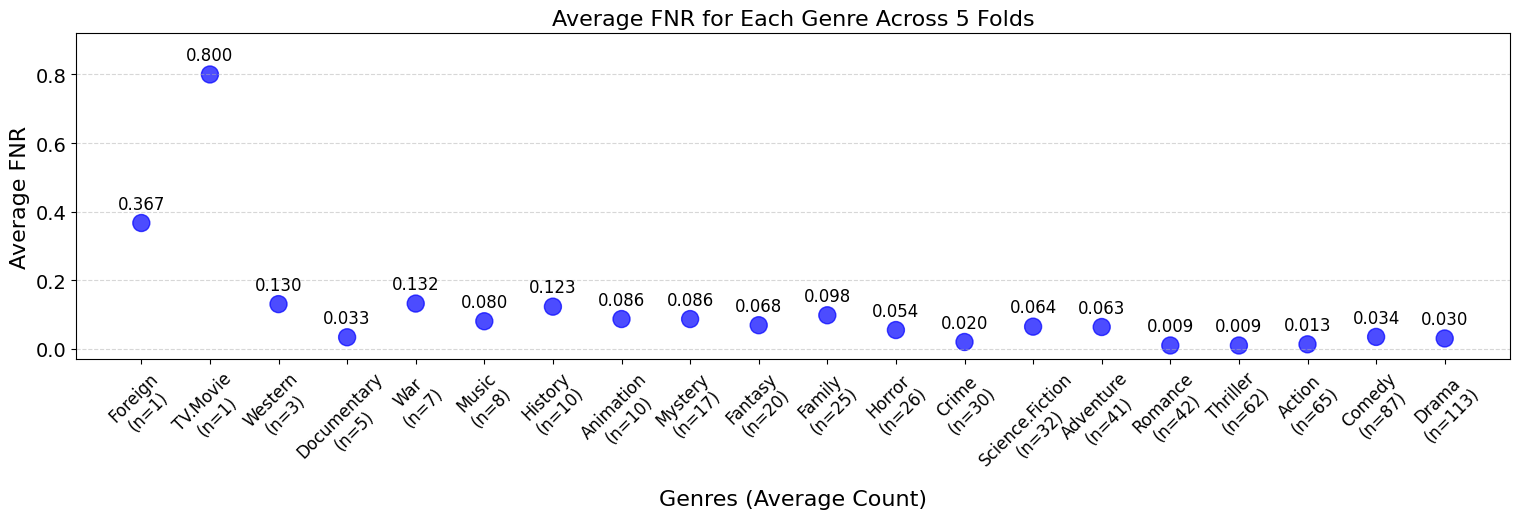

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def calculate_metrics(y_true, y_pred, metric_type):
    # Calculate confusion matrix with explicit labels
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    # Calculate the specified metric
    if metric_type.lower() == 'fpr':  # False Positive Rate
        return fp / (fp + tn) if (fp + tn) > 0 else 0
    elif metric_type.lower() == 'tpr':  # True Positive Rate (Recall/Sensitivity)
        return tp / (tp + fn) if (tp + fn) > 0 else 0
    elif metric_type.lower() == 'fnr':  # False Negative Rate
        return fn / (fn + tp) if (fn + tp) > 0 else 0
    elif metric_type.lower() == 'tnr':  # True Negative Rate (Specificity)
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    elif metric_type.lower() == 'precision':  # Precision
        return tp / (tp + fp) if (tp + fp) > 0 else 0
    elif metric_type.lower() == 'f1':  # F1 Score
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    elif metric_type.lower() == 'accuracy':  # Accuracy
        return (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    else:
        raise ValueError(f"Unsupported metric type: {metric_type}")

def get_genre_counts(y_true, genre_columns):
    n_genres = len(genre_columns)
    counts = []
    
    for i in range(n_genres):
        count = np.sum(y_true[:, i] == 1)
        counts.append(int(count))
        
    return counts

def plot_average_genre_metric(y_true_list, y_pred_list, genre_columns, metric_type='fpr', sort_by_count=False):
    n_folds = len(y_true_list)
    n_genres = len(genre_columns)
    all_metric_values = np.zeros((n_folds, n_genres))
    all_counts = np.zeros((n_folds, n_genres))
    
    # Set larger font sizes for all plot elements
    plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 14,
        'legend.fontsize': 14
    })
    
    # Get metric name for display
    metric_name = metric_type.upper()
    if metric_type.lower() == 'tpr':
        metric_name = 'TPR (Recall/Sensitivity)'
    elif metric_type.lower() == 'tnr':
        metric_name = 'TNR (Specificity)'
    
    # Calculate metric for each fold and store
    for i, (y_true, y_pred) in enumerate(zip(y_true_list, y_pred_list)):
        # print(f"Processing Fold {i+1}/{n_folds}")
        
        # Get counts for each genre
        fold_counts = get_genre_counts(y_true, genre_columns)
        all_counts[i, :] = fold_counts
        
        # Calculate metrics without plotting individual folds
        metric_values = []
        for j in range(n_genres):
            y_true_bin = y_true[:, j]
            y_pred_bin = y_pred[:, j]
            metric_value = calculate_metrics(y_true_bin, y_pred_bin, metric_type)
            metric_values.append(metric_value)
        
        # Store metric values for this fold
        all_metric_values[i, :] = metric_values
    
    # Calculate average metrics and counts across all folds
    avg_metric_values = np.mean(all_metric_values, axis=0)
    std_metric_values = np.std(all_metric_values, axis=0)
    avg_counts = np.mean(all_counts, axis=0).astype(int)
    
    # Create genre labels with counts
    genre_labels_with_counts = [f"{genre}\n(n={count})" for genre, count in zip(genre_columns, avg_counts)]
    
    # Sort by count if requested
    if sort_by_count:
        # Get indices that would sort the array in ascending order
        sorted_indices = np.argsort(avg_counts)
        
        # Reorder everything based on the sorted indices
        genre_labels_with_counts = [genre_labels_with_counts[i] for i in sorted_indices]
        avg_metric_values = avg_metric_values[sorted_indices]
        std_metric_values = std_metric_values[sorted_indices]
    
    # Create final plot with average points only
    # plt.figure(figsize=(16, 9))  # Increased figure size for better readability
    plt.figure(figsize=(16, 6))  # Increased figure size for better readability
    
    # Create x positions for the genres
    x_positions = np.arange(len(genre_labels_with_counts))
    
    # Plot average points as circles with size proportional to count
    sizes = [max(150, min(600, count/8)) for count in avg_counts]  # Increased marker sizes
    scatter = plt.scatter(x_positions, avg_metric_values, s=sizes, color='blue', alpha=0.7)
    
    # Set the x-ticks and labels
    plt.xticks(x_positions, genre_labels_with_counts, rotation=45, ha='center')
    
    plt.xlabel('Genres (Average Count)')
    plt.ylabel(f'Average {metric_name}')
    plt.title(f'Average {metric_name} for Each Genre Across {len(y_pred_list)} Folds')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add more padding to accommodate larger fonts
    plt.tight_layout(pad=3.0)

    # Display average metric values above the points with larger font
    for i, v in enumerate(avg_metric_values):
        plt.text(i, v + 0.03, f'{v:.3f}', ha='center', va='bottom', fontsize=12)
    
    # Ensure y-axis has some padding at the top
    plt.ylim(top=max(avg_metric_values) * 1.15)
    
    return plt

# Example usage:
# Without sorting
# final_plot = plot_average_genre_metric(y_true_list, y_pred_list, genre_columns, metric_type='tpr')

# With sorting by count
final_plot = plot_average_genre_metric(y_true_list, y_pred_list, genre_columns, metric_type='fnr', sort_by_count=True)
final_plot.show()

### Submission

In [28]:
# print("Making final predictions with optimal conformal sets...")
# # Use the best alpha for the final prediction
# submission, probs, _, _ = predict_with_conformal(
#     model, data, tokenizer, nonconformity_scores, threshold=best_threshold,
#     alpha=best_alpha,
#     # alpha=0.03,
#     batch_size=16
# )

# print("Saving submission file...")
# submission.to_csv('submission.csv', index=False)
# print("Done!")

In [29]:
print("Making final predictions with optimal conformal sets...")

fold_submissions = []
fold_probs_list = []
for fold in range(len(fold_models)):
    # Use the best alpha for the final prediction
    submission, probs, _, _ = predict_with_conformal(
        fold_models[fold],
        fold_data_list[fold],
        fold_tokenizers[fold],
        fold_nonconformity_scores_list[fold],
        threshold=fold_thresholds[fold],
        alpha=fold_best_alphas[fold],
        batch_size=16
    )
    fold_submissions.append(submission)
    fold_probs_list.append(probs)

Making final predictions with optimal conformal sets...


100%|██████████| 150/150 [00:46<00:00,  3.20it/s]


No scores on class 17


100%|██████████| 150/150 [00:46<00:00,  3.21it/s]


In [30]:
# Ensemble the folds with majority voting
sum_submissions = sum(fold_submissions)
# majority_threshold = np.ceil(len(fold_submissions) / 2)

majority_threshold = 3
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission3 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)
# submission

majority_threshold = 4
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission4 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)
# submission

majority_threshold = 5
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission5 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

print("Saving submission file...")
# save_dir = 'bert-sep-cv/bestalpha'
# save_dir = 'moviebert-sep-cv/bestalpha'
save_dir = 'berthidden-sep-cv/bestalpha'
!mkdir -p $save_dir
submission3.to_csv(f'{save_dir}/submission_vote3.csv', index=False)
submission4.to_csv(f'{save_dir}/submission_vote4.csv', index=False)
submission5.to_csv(f'{save_dir}/submission_vote5.csv', index=False)
print("Done!")

Saving submission file...
Done!


In [31]:
for i, submission in enumerate([submission3, submission4, submission5], start=3):
    print(f"============= Submission {i} ==============")

    # Analyze the number of genres predicted per movie
    genre_counts = submission.iloc[:, 1:].sum(axis=1)
    print("\nGenre count statistics:")
    print(f"  Minimum genres per movie: {genre_counts.min()}")
    print(f"  Maximum genres per movie: {genre_counts.max()}")
    print(f"  Average genres per movie: {genre_counts.mean():.2f}")
    print(f"  Median genres per movie: {genre_counts.median()}")
    
    # Distribution of genre counts
    genre_count_dist = genre_counts.value_counts().sort_index()
    print("\nDistribution of genre counts:")
    for count, freq in genre_count_dist.items():
        percentage = 100 * freq / len(submission)
        print(f"  {count} genres: {freq} movies ({percentage:.2f}%)")
    
    print(f"\nPossible maximum score: {1 - (genre_counts.mean()/20/2)}")

============= Submission 3 ==============

Genre count statistics:
  Minimum genres per movie: 5
  Maximum genres per movie: 19
  Average genres per movie: 11.06
  Median genres per movie: 11.0

Distribution of genre counts:
  5 genres: 17 movies (0.71%)
  6 genres: 94 movies (3.94%)
  7 genres: 149 movies (6.25%)
  8 genres: 192 movies (8.05%)
  9 genres: 222 movies (9.31%)
  10 genres: 311 movies (13.04%)
  11 genres: 400 movies (16.77%)
  12 genres: 379 movies (15.89%)
  13 genres: 195 movies (8.18%)
  14 genres: 145 movies (6.08%)
  15 genres: 118 movies (4.95%)
  16 genres: 69 movies (2.89%)
  17 genres: 49 movies (2.05%)
  18 genres: 29 movies (1.22%)
  19 genres: 16 movies (0.67%)

Possible maximum score: 0.7234591194968554
============= Submission 4 ==============

Genre count statistics:
  Minimum genres per movie: 4
  Maximum genres per movie: 17
  Average genres per movie: 9.12
  Median genres per movie: 9.0

Distribution of genre counts:
  4 genres: 10 movies (0.42%)
  5 ge

## Risk Control FNR

In [32]:
def predict_with_conformal_risk_fnr(model, data, tokenizer, nonconformity_scores, threshold=0.5, alpha=0.1, batch_size=16):
    ######################################################################
    # Control Risk
    ######################################################################

    val_dataset = MovieDataset(
        texts=data['val_texts'],
        tokenizer=tokenizer
    )
    
    val_data_loader = DataLoader(
        val_dataset,
        batch_size=batch_size
    )
    
    # Calculate quantile for conformal prediction
    # q_by_class = []
    # for class_idx, scores in enumerate(nonconformity_scores):
    #     if scores:
    #         q_by_class.append(float(np.quantile(np.array(scores), 1 - alpha)))
    #     else:
    #         # scores=[] if there were no correct predictions
    #         print(f"No scores on class {class_idx}")
    #         q_by_class.append(0)
    # q = np.array(q_by_class)

    model.eval()
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(val_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            all_probs.append(probs.cpu().numpy())
    
    all_probs = np.vstack(all_probs)
    
    # Construct conformal prediction sets
    # Include genre in set if probability >= (1-q)
    # conformal_preds = (all_probs >= (1 - q)).astype(int)
    
    # Also create standard predictions with the best threshold
    # standard_preds = (all_probs > threshold).astype(int)

    sgmd = all_probs # sigmoid scores
    labels = data['val_labels']
    n = int(len(data['val_labels']) * 9/10)
    
    def false_negative_rate(prediction_set, gt_labels):
        return 1-((prediction_set * gt_labels).sum(axis=1)/gt_labels.sum(axis=1)).mean()

    # Split the softmax scores into calibration and validation sets (save the shuffling)
    idx = np.array([1] * n + [0] * (sgmd.shape[0]-n)) > 0
    np.random.shuffle(idx)
    cal_sgmd, val_sgmd = sgmd[idx,:], sgmd[~idx,:]
    cal_labels, val_labels = labels[idx], labels[~idx]

    def lamhat_threshold(lam):
        return false_negative_rate(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))

    lamhat = brentq(lamhat_threshold, 0, 1)
    prediction_sets = val_sgmd >= lamhat

    # Calculate empirical FNR
    print(f"The empirical FNR is: {false_negative_rate(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

    ######################################################################
    # Prediction
    ######################################################################

    # Create dataset and dataloader for test data
    test_dataset = MovieDataset(
        texts=data['test_texts'],
        tokenizer=tokenizer
    )
    
    test_data_loader = DataLoader(
        test_dataset,
        batch_size=batch_size
    )
    
    # Calculate quantile for conformal prediction
    # q = np.quantile(nonconformity_scores, 1 - alpha, axis=0)
    
    model.eval()
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(test_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            all_probs.append(probs.cpu().numpy())
    
    all_probs = np.vstack(all_probs)
    
    # Construct Conformal risk control  sets
    # Include genre in set if probability >= (1-q)
    conformal_preds = (all_probs >= (lamhat)).astype(int)
    
    # Ensure each movie has at least one genre
    # If no genre is predicted, assign 1 to ALL genres
    for i in range(conformal_preds.shape[0]):
        if np.sum(conformal_preds[i]) == 0:
            # Set all genres to 1
            conformal_preds[i, :] = 1

    # Create submission dataframe
    submission = pd.DataFrame({'id': data['test_ids']})
    for i, genre in enumerate(genre_columns):
        submission[genre] = conformal_preds[:, i]
    
    return submission, all_probs, conformal_preds, lamhat

In [33]:
np.random.seed(123)

print("Predicting with conformal risk control")
fold_submissions = []
for fold in range(len(fold_models)):
    print("Fold: ", fold)
    submission, all_probs, conformal_preds, lamhat = predict_with_conformal_risk_fnr(
        fold_models[fold],
        fold_data_list[fold],
        fold_tokenizers[fold],
        fold_nonconformity_scores_list[fold],
        fold_thresholds[fold],
        alpha=0.1
    )
    fold_submissions.append(submission)

Predicting with conformal risk control
Fold:  0


100%|██████████| 30/30 [00:09<00:00,  3.18it/s]


The empirical FNR is: 0.1191468253968253 and the threshold value is: 0.37970255315331786


100%|██████████| 150/150 [00:47<00:00,  3.19it/s]


Fold:  1


100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


The empirical FNR is: 0.07673611111111123 and the threshold value is: 0.35527111589763605


100%|██████████| 150/150 [00:46<00:00,  3.20it/s]


Fold:  2


100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


The empirical FNR is: 0.1298611111111111 and the threshold value is: 0.3852554708713058


100%|██████████| 150/150 [00:46<00:00,  3.21it/s]


Fold:  3


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


The empirical FNR is: 0.08333333333333337 and the threshold value is: 0.351481035351007


100%|██████████| 150/150 [00:46<00:00,  3.19it/s]


Fold:  4


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


The empirical FNR is: 0.08472222222222225 and the threshold value is: 0.3557967394578303


100%|██████████| 150/150 [00:47<00:00,  3.19it/s]


In [34]:
# Ensemble the folds with majority voting
sum_submissions = sum(fold_submissions)
# majority_threshold = np.ceil(len(fold_submissions) / 2)

majority_threshold = 1
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission1 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 2
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission2 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 3
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission3 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 4
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission4 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 5
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission5 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

print("Saving submission file...")
# save_dir = 'bert-sep-cv/fnr'
# save_dir = 'moviebert-sep-cv/fnr'
save_dir = 'berthidden-sep-cv/fnr'
!mkdir -p $save_dir
submission1.to_csv(f'{save_dir}/submission_vote1.csv', index=False)
submission2.to_csv(f'{save_dir}/submission_vote2.csv', index=False)
submission3.to_csv(f'{save_dir}/submission_vote3.csv', index=False)
submission4.to_csv(f'{save_dir}/submission_vote4.csv', index=False)
submission5.to_csv(f'{save_dir}/submission_vote5.csv', index=False)
print("Done!")

Saving submission file...
Done!


In [35]:
for i, submission in enumerate([submission1, submission2, submission3, submission4, submission5], start=1):
    print(f"============= Submission {i} ==============")

    # Analyze the number of genres predicted per movie
    genre_counts = submission.iloc[:, 1:].sum(axis=1)
    print("\nGenre count statistics:")
    print(f"  Minimum genres per movie: {genre_counts.min()}")
    print(f"  Maximum genres per movie: {genre_counts.max()}")
    print(f"  Average genres per movie: {genre_counts.mean():.2f}")
    print(f"  Median genres per movie: {genre_counts.median()}")
    
    # Distribution of genre counts
    genre_count_dist = genre_counts.value_counts().sort_index()
    print("\nDistribution of genre counts:")
    for count, freq in genre_count_dist.items():
        percentage = 100 * freq / len(submission)
        print(f"  {count} genres: {freq} movies ({percentage:.2f}%)")
    
    print(f"\nPossible maximum score: {1 - (genre_counts.mean()/20/2)}")

============= Submission 1 ==============

Genre count statistics:
  Minimum genres per movie: 3
  Maximum genres per movie: 19
  Average genres per movie: 7.77
  Median genres per movie: 8.0

Distribution of genre counts:
  3 genres: 181 movies (7.59%)
  4 genres: 142 movies (5.95%)
  5 genres: 96 movies (4.03%)
  6 genres: 205 movies (8.60%)
  7 genres: 417 movies (17.48%)
  8 genres: 445 movies (18.66%)
  9 genres: 333 movies (13.96%)
  10 genres: 284 movies (11.91%)
  11 genres: 126 movies (5.28%)
  12 genres: 78 movies (3.27%)
  13 genres: 47 movies (1.97%)
  14 genres: 18 movies (0.75%)
  15 genres: 6 movies (0.25%)
  16 genres: 2 movies (0.08%)
  17 genres: 3 movies (0.13%)
  18 genres: 1 movies (0.04%)
  19 genres: 1 movies (0.04%)

Possible maximum score: 0.8057442348008386
============= Submission 2 ==============

Genre count statistics:
  Minimum genres per movie: 3
  Maximum genres per movie: 16
  Average genres per movie: 6.86
  Median genres per movie: 7.0

Distribution 

## Risk Control Evaluation Metric

In [36]:
def predict_with_conformal_risk_metric(model, data, tokenizer, nonconformity_scores, threshold=0.5, alpha=0.1, batch_size=16):
    ######################################################################
    # Control Risk
    ######################################################################

    val_dataset = MovieDataset(
        texts=data['val_texts'],
        tokenizer=tokenizer
    )
    
    val_data_loader = DataLoader(
        val_dataset,
        batch_size=batch_size
    )
    
    # Calculate quantile for conformal prediction
    # q_by_class = []
    # for class_idx, scores in enumerate(nonconformity_scores):
    #     if scores:
    #         q_by_class.append(float(np.quantile(np.array(scores), 1 - alpha)))
    #     else:
    #         # scores=[] if there were no correct predictions
    #         print(f"No scores on class {class_idx}")
    #         q_by_class.append(0)
    # q = np.array(q_by_class)

    model.eval()
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(val_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            all_probs.append(probs.cpu().numpy())
    
    all_probs = np.vstack(all_probs)
    
    # Construct conformal prediction sets
    # Include genre in set if probability >= (1-q)
    # conformal_preds = (all_probs >= (1 - q)).astype(int)
    
    # Also create standard predictions with the best threshold
    # standard_preds = (all_probs > threshold).astype(int)

    sgmd = all_probs # sigmoid scores
    labels = data['val_labels']
    n = int(len(data['val_labels']) * 0.8)

    # loss func
    def eval_metric(prediction_set, gt_labels):
        conformal_preds = prediction_set
        true_labels = gt_labels

        # Calculate coverage for each sample
        coverages = []
        set_sizes = []
        
        for i in range(len(true_labels)):
            # Check if all true genres are in the prediction set
            # Y^(i) ⊆ S^(i)
            covered = True
            for j in range(len(true_labels[i])):
                if true_labels[i][j] == 1 and conformal_preds[i][j] == 0:
                    covered = False
                    break
            
            coverages.append(covered)
            
            # Calculate set size |S^(i)|
            set_size = np.sum(conformal_preds[i])
            set_sizes.append(set_size)
        
        # Calculate average coverage
        avg_coverage = np.mean(coverages)
        # # Calculate average set size
        # avg_set_size = np.mean(set_sizes)
        
        # # Calculate the final metrics
        # coverage_indicator = 1 if avg_coverage >= 0.9 else 0
        # length_score = 1 - (avg_set_size / 20)
        
        # # Final metric
        # final_metric = 0.5 * (coverage_indicator + length_score)

        return 1 - avg_coverage
    
    # Split the softmax scores into calibration and validation sets (save the shuffling)
    idx = np.array([1] * n + [0] * (sgmd.shape[0]-n)) > 0
    np.random.shuffle(idx)
    cal_sgmd, val_sgmd = sgmd[idx,:], sgmd[~idx,:]
    cal_labels, val_labels = labels[idx], labels[~idx]

    def lamhat_threshold(lam):
        return eval_metric(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))

    lamhat = brentq(lamhat_threshold, 0, 1)
    prediction_sets = val_sgmd >= lamhat

    # Calculate empirical FNR
    print(f"The average coverage is: {1 - eval_metric(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

    ######################################################################
    # Prediction
    ######################################################################

    # Create dataset and dataloader for test data
    test_dataset = MovieDataset(
        texts=data['test_texts'],
        tokenizer=tokenizer
    )
    
    test_data_loader = DataLoader(
        test_dataset,
        batch_size=batch_size
    )
    
    # Calculate quantile for conformal prediction
    # q = np.quantile(nonconformity_scores, 1 - alpha, axis=0)
    
    model.eval()
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(test_data_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
            all_probs.append(probs.cpu().numpy())
    
    all_probs = np.vstack(all_probs)
    
    # Construct Conformal risk control  sets
    # Include genre in set if probability >= (1-q)
    conformal_preds = (all_probs >= (lamhat)).astype(int)
    
    # Ensure each movie has at least one genre
    # If no genre is predicted, assign 1 to ALL genres
    for i in range(conformal_preds.shape[0]):
        if np.sum(conformal_preds[i]) == 0:
            # Set all genres to 1
            conformal_preds[i, :] = 1

    # Create submission dataframe
    submission = pd.DataFrame({'id': data['test_ids']})
    for i, genre in enumerate(genre_columns):
        submission[genre] = conformal_preds[:, i]
    
    return submission, all_probs, conformal_preds, lamhat

In [37]:
np.random.seed(123)

print("Predicting with conformal risk control")
fold_submissions = []
for fold in range(len(fold_models)):
    print("Fold: ", fold)
    submission, all_probs, conformal_preds, lamhat = predict_with_conformal_risk_metric(
        fold_models[fold],
        fold_data_list[fold],
        fold_tokenizers[fold],
        fold_nonconformity_scores_list[fold],
        fold_thresholds[fold],
        alpha=0.1
        # alpha=0.9
    )
    fold_submissions.append(submission)

Predicting with conformal risk control
Fold:  0


100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


The average coverage is: 0.9166666666666666 and the threshold value is: 0.21264093369110684


100%|██████████| 150/150 [00:47<00:00,  3.19it/s]


Fold:  1


100%|██████████| 30/30 [00:09<00:00,  3.18it/s]


The average coverage is: 0.8541666666666666 and the threshold value is: 0.2522847801435677


100%|██████████| 150/150 [00:46<00:00,  3.19it/s]


Fold:  2


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


The average coverage is: 0.8854166666666666 and the threshold value is: 0.24737408012059958


100%|██████████| 150/150 [00:46<00:00,  3.20it/s]


Fold:  3


100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


The average coverage is: 0.90625 and the threshold value is: 0.22382447868473943


100%|██████████| 150/150 [00:46<00:00,  3.20it/s]


Fold:  4


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


The average coverage is: 0.8854166666666666 and the threshold value is: 0.23708496242660398


100%|██████████| 150/150 [00:46<00:00,  3.22it/s]


In [38]:
# Ensemble the folds with majority voting
sum_submissions = sum(fold_submissions)
# majority_threshold = np.ceil(len(fold_submissions) / 2)

majority_threshold = 1
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission1 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 2
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission2 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 3
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission3 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 4
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission4 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

majority_threshold = 5
majority_votes = (sum_submissions >= majority_threshold).astype(int).drop('id', axis=1)
submission5 = pd.concat([fold_submissions[0].id, majority_votes], axis=1)

print("Saving submission file...")
# save_dir = 'bert-sep-cv/cov'
# save_dir = 'moviebert-sep-cv/cov'
# save_dir = 'moviebert-sep-cv/cov-90'
save_dir = 'berthidden-sep-cv/cov-90'
!mkdir -p $save_dir
submission1.to_csv(f'{save_dir}/submission_vote1.csv', index=False)
submission2.to_csv(f'{save_dir}/submission_vote2.csv', index=False)
submission3.to_csv(f'{save_dir}/submission_vote3.csv', index=False)
submission4.to_csv(f'{save_dir}/submission_vote4.csv', index=False)
submission5.to_csv(f'{save_dir}/submission_vote5.csv', index=False)
print("Done!")

Saving submission file...
Done!


In [39]:
for i, submission in enumerate([submission1, submission2, submission3, submission4, submission5], start=1):
    print(f"============= Submission {i} ==============")

    # Analyze the number of genres predicted per movie
    genre_counts = submission.iloc[:, 1:].sum(axis=1)
    print("\nGenre count statistics:")
    print(f"  Minimum genres per movie: {genre_counts.min()}")
    print(f"  Maximum genres per movie: {genre_counts.max()}")
    print(f"  Average genres per movie: {genre_counts.mean():.2f}")
    print(f"  Median genres per movie: {genre_counts.median()}")
    
    # Distribution of genre counts
    genre_count_dist = genre_counts.value_counts().sort_index()
    print("\nDistribution of genre counts:")
    for count, freq in genre_count_dist.items():
        percentage = 100 * freq / len(submission)
        print(f"  {count} genres: {freq} movies ({percentage:.2f}%)")
    
    print(f"\nPossible maximum score: {1 - (genre_counts.mean()/20/2)}")

============= Submission 1 ==============

Genre count statistics:
  Minimum genres per movie: 4
  Maximum genres per movie: 20
  Average genres per movie: 11.10
  Median genres per movie: 11.0

Distribution of genre counts:
  4 genres: 3 movies (0.13%)
  5 genres: 31 movies (1.30%)
  6 genres: 119 movies (4.99%)
  7 genres: 162 movies (6.79%)
  8 genres: 225 movies (9.43%)
  9 genres: 246 movies (10.31%)
  10 genres: 310 movies (13.00%)
  11 genres: 244 movies (10.23%)
  12 genres: 320 movies (13.42%)
  13 genres: 262 movies (10.99%)
  14 genres: 133 movies (5.58%)
  15 genres: 104 movies (4.36%)
  16 genres: 72 movies (3.02%)
  17 genres: 44 movies (1.84%)
  18 genres: 42 movies (1.76%)
  19 genres: 31 movies (1.30%)
  20 genres: 37 movies (1.55%)

Possible maximum score: 0.7225786163522012
============= Submission 2 ==============

Genre count statistics:
  Minimum genres per movie: 3
  Maximum genres per movie: 20
  Average genres per movie: 9.87
  Median genres per movie: 10.0

Di

In [40]:
for i, submission in enumerate([submission1, submission2, submission3, submission4, submission5], start=1):
    print(f"============= Submission {i} ==============")

    # Analyze the number of genres predicted per movie
    genre_counts = submission.iloc[:, 1:].sum(axis=1)
    print("\nGenre count statistics:")
    print(f"  Minimum genres per movie: {genre_counts.min()}")
    print(f"  Maximum genres per movie: {genre_counts.max()}")
    print(f"  Average genres per movie: {genre_counts.mean():.2f}")
    print(f"  Median genres per movie: {genre_counts.median()}")
    
    # Distribution of genre counts
    genre_count_dist = genre_counts.value_counts().sort_index()
    print("\nDistribution of genre counts:")
    for count, freq in genre_count_dist.items():
        percentage = 100 * freq / len(submission)
        print(f"  {count} genres: {freq} movies ({percentage:.2f}%)")
    
    print(f"\nPossible maximum score: {1 - (genre_counts.mean()/20/2)}")

============= Submission 1 ==============

Genre count statistics:
  Minimum genres per movie: 4
  Maximum genres per movie: 20
  Average genres per movie: 11.10
  Median genres per movie: 11.0

Distribution of genre counts:
  4 genres: 3 movies (0.13%)
  5 genres: 31 movies (1.30%)
  6 genres: 119 movies (4.99%)
  7 genres: 162 movies (6.79%)
  8 genres: 225 movies (9.43%)
  9 genres: 246 movies (10.31%)
  10 genres: 310 movies (13.00%)
  11 genres: 244 movies (10.23%)
  12 genres: 320 movies (13.42%)
  13 genres: 262 movies (10.99%)
  14 genres: 133 movies (5.58%)
  15 genres: 104 movies (4.36%)
  16 genres: 72 movies (3.02%)
  17 genres: 44 movies (1.84%)
  18 genres: 42 movies (1.76%)
  19 genres: 31 movies (1.30%)
  20 genres: 37 movies (1.55%)

Possible maximum score: 0.7225786163522012
============= Submission 2 ==============

Genre count statistics:
  Minimum genres per movie: 3
  Maximum genres per movie: 20
  Average genres per movie: 9.87
  Median genres per movie: 10.0

Di

# Submission Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def compare_genre_distributions(
    dataframes_list, 
    names_list, 
    figsize=(20, 10),
    title="Genre Distribution Percentage Comparison",
    sort_by=None
):
    # if len(dataframes_list) != len(names_list):
    #     raise ValueError("Length of dataframes_list and names_list must be the same")
        
    # Initialize a list to collect all columns from all dataframes
    all_df_columns = []
    
    # Get all unique column names from dataframes (excluding 'id' if present)
    for df in dataframes_list:
        if 'id' in df.columns:
            df_columns = df.drop(columns='id').columns.tolist()
        else:
            df_columns = df.columns.tolist()
        all_df_columns.extend(df_columns)
    
    # Remove duplicates
    all_df_columns = list(set(all_df_columns))
    
    # Create DataFrame for comparison
    # Combine all relevant columns
    all_cols = list(set(genre_columns).union(set(all_df_columns)))
    comparison_df = pd.DataFrame(index=all_cols)
    
    # Add data for each dataframe as percentages
    for i, (df, name) in enumerate(zip(dataframes_list, names_list)):
        if 'id' in df.columns:
            df_counts = df.drop(columns='id').sum()
        else:
            df_counts = df.sum()
        
        total = df_counts.sum()
        comparison_df[name] = pd.Series(df_counts) / total * 100
    
    # Sort by specified column or first column if not specified
    comparison_df = comparison_df.fillna(0)
    if sort_by is None and len(comparison_df.columns) > 0:
        sort_by = comparison_df.columns[0]
    
    if sort_by in comparison_df.columns:
        comparison_df = comparison_df.sort_values(by=sort_by, ascending=False)

    # Set up color palette for better distinction
    colors = plt.cm.tab10(np.linspace(0, 1, len(comparison_df.columns)))

    # plt.clf()
    
    # Create plot
    plt.figure(figsize=figsize)
    ax = comparison_df.plot(kind='bar', figsize=figsize, width=0.8, color=colors)
    
    # Customize plot
    plt.title(title, fontsize=20)
    plt.xlabel('Genre', fontsize=16)
    plt.ylabel('Percentage (%)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.legend(fontsize=14, loc='upper right')
    plt.tight_layout()
    
    return comparison_df

In [ ]:
dfs_to_compare = [
    df[['id'] + genre_columns],
    pd.read_csv('/kaggle/input/win-25-stat-528-kaggle-competition-2/submission_best.csv'),
    submission1,
    submission2,
    submission3,
    submission4,
    submission5,
    # fold_submissions[0],
    # fold_submissions[1],
    # fold_submissions[2],
    # fold_submissions[3],
    # fold_submissions[4],
]
df_names = [
    'Train',
    'Best',
    'Ensemble 1',
    'Ensemble 2',
    'Ensemble 3',
    'Ensemble 4',
    'Ensemble 5',
    'Fold 1',
    'Fold 2',
    'Fold 3',
    'Fold 4',
    'Fold 5',
]

# Run comparison
result_df = compare_genre_distributions(
    dataframes_list=dfs_to_compare, 
    names_list=df_names,
    sort_by='Train'
)

In [ ]:
id = 3
pd.concat([fold.iloc[id] for fold in fold_submissions], axis=1).T.drop(columns=['id'])

In [ ]:
!wc -l submission.csv

In [ ]:
!head -n10 submission.csv